<a href="https://colab.research.google.com/github/joony0512/Stastistics_and_MachineLearning/blob/main/%EA%B1%B4%EC%84%A4%EA%B8%B0%EA%B3%84%EC%98%A4%EC%9D%BC%EC%83%81%ED%83%9C%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#EDA


## train

In [2]:
# CSV 파일을 불러와 데이터프레임으로 저장합니다.
train_df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/train.csv')
# 데이터프레임의 첫 5개 행을 출력합니다.
train_df.head()


,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [3]:
# 데이터프레임의 정보를 출력합니다.
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(train_df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(train_df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(train_df[train_df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(train_df[train_df[item].isnull() == True])/len(train_df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(train_df[item].min())

for item in dataFeatures:
    maxValue.append(train_df[item].max())

for item in dataFeatures:
    unique.append(train_df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(train_df[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [4]:
# COMPONENT_ARBITRARY 변수의 분포를 확인합니다.
train_df['COMPONENT_ARBITRARY'].value_counts()


COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

## test

In [5]:
test_df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/test.csv')

In [6]:
test_df.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [7]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test_df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test_df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test_df[test_df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test_df[test_df[item].isnull() == True])/len(test_df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test_df[item].min())

for item in dataFeatures:
    maxValue.append(test_df[item].max())

for item in dataFeatures:
    unique.append(test_df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test_df[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


## Original Feature 분석

In [8]:
print(train_df.shape)
print(test_df.shape)

(14095, 54)
(6041, 19)


### train data column

> Train 데이터의 각 Feature는 다음과 같은 의미를 가지고 있습니다.
*   `ID` : ID
*   `COMPONENT_ARBITRARY` : sample 오일 관련 부품 (Component 4종)
*   `ANONYMOUS_1` : 무명 Feature 1, 수치형 데이터
*   `YEAR` : 오일 진단 년도(Year)
*   `SAMPLE_TRANSFER_DAY` : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)
*   `ANONYMOUS_2` : 무명 Feature 2, 수치형 데이터
*   `AG` : 은(Silver) 함유량
*   `AL` : 알루미늄(Aluminium) 함유량
*   `B` : 붕소(Boron) 함유량
*   `BA` : 바륨(Barium) 함유량
*   `BE` : 베릴륨(Beryllium) 함유량
*   `CA` : 칼슘(Calcium) 함유량
*   `CD` : 카드뮴(Cadmium) 함유량
*   `CO` : 코발트(Cobolt) 함유량
*   `CR` : 크로뮴(Chromium) 함유량
*   `CR` : 구리(Copper) 함유량
*   `FH2O` : 물(Water) 수치(By FT-IR)
*   `FNOX` : 질소산화물(Nox) 수치(By FT-IR)
*   `FOPTIMETHGLY` : 비식별화
*   `FOXID` : 산화(Oxidation) 수치(By FT-IR)
*   `FSO4` : 황산염(S04) 수치(By FT-IR)
*   `FTBN` : 염기성 첨가제물질 수치(By FT-IR)
*   `FE` : 철(Iron) 함유량
*   `FUEL` : 연료 함유량
*   `H2O` : 물 함유량
*   `K` : 칼륨(Potassium) 함유량
*   `LI` : 리튬(Lithium) 함유량
*   `MG` : 마그네슘(Magnesium) 함유량
*   `MN` : 망가니즈(Manganese) 함유량
*   `MO` : 몰리브덴(Molybdenum) 함유량
*   `NA` : 나트륨(Sodium) 함유량
*   `NI` : 니켈(Nickel) 함유량
*   `P` : 인(Phosphorus) 함유량
*   `PB` : 납(Lead) 함유량
*   `PQINDEX` : 입자 정량화 지수(Particle Quantifier Index)
*   `S` : 황(Sulphur) 함유량
*   `SB` : 안티몬(Antimony) 함유량
*   `SI` : 규소(Silicone) 함유량
*   `SN` : 주석(Tin) 함유량
*   `SOOTPERCENTAGE` : 그을음 정도
*   `TI` : 티타늄(Titanium) 함유량
*   `U100` : 100㎛ 이상 입자 크기(Particle Count)
*   `U75` : 75㎛ 이상 입자 크기(Particle Count)
*   `U50` : 50㎛ 이상 입자 크기(Particle Count)
*   `U25` : 25㎛ 이상 입자 크기(Particle Count)
*   `U20` : 20㎛ 이상 입자 크기(Particle Count)
*   `U14` : 14㎛ 이상 입자 크기(Particle Count)
*   `U6` : 6㎛ 이상 입자 크기(Particle Count)
*   `U4` : 4㎛ 이상 입자 크기(Particle Count)
*   `V` : 바나듐(Vanadium) 함유량
*   `V100` : 점도(Viscosity) @ 100 degrees
*   `V40` : 점도(Viscosity) @ 40 degrees
*   `ZN` : 아연(Zinc) 함유량
*   `Y_LABEL` : 오일 정상 여부(0 : 정상, 1 : 이상)




In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

#데이터 전처리

In [10]:
# Y_LABEL을 int형에서 object형으로 변환
train_df = train_df.astype({'Y_LABEL' : 'object'})

In [11]:
#인덱스 변경
train_df.set_index('ID', inplace=True)

In [12]:
#COMPONENT_ARBITRARY컬럼 onehot encoding
one_hot_encoded = pd.get_dummies(train_df['COMPONENT_ARBITRARY'])
print(one_hot_encoded)

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4
ID                                                         
TRAIN_00000           0           0           1           0
TRAIN_00001           0           1           0           0
TRAIN_00002           0           1           0           0
TRAIN_00003           0           0           1           0
TRAIN_00004           0           0           1           0
...                 ...         ...         ...         ...
TRAIN_14090           0           0           1           0
TRAIN_14091           1           0           0           0
TRAIN_14092           0           0           1           0
TRAIN_14093           0           1           0           0
TRAIN_14094           0           1           0           0

[14095 rows x 4 columns]


In [13]:
#원래 열 제거
# train_df = train_df.drop('COMPONENT_ARBITRARY', axis =1) 나중에 사용

In [14]:
# #새로운 열들 추가
# train_df.insert(0, 'COMPONENT1', one_hot_encoded['COMPONENT1'])
# train_df.insert(1, 'COMPONENT2', one_hot_encoded['COMPONENT2'])
# train_df.insert(2, 'COMPONENT3', one_hot_encoded['COMPONENT3'])
# train_df.insert(3, 'COMPONENT4', one_hot_encoded['COMPONENT4'])
# print(train_df)나중에사용

## 결측치 확인 및 null 값 처리

In [15]:
train_df.isnull().sum()/train_df.shape[0]*100

COMPONENT_ARBITRARY     0.000000
ANONYMOUS_1             0.000000
YEAR                    0.000000
SAMPLE_TRANSFER_DAY     0.000000
ANONYMOUS_2             0.000000
AG                      0.000000
AL                      0.000000
B                       0.000000
BA                      0.000000
BE                      0.000000
CA                      0.000000
CD                      9.890032
CO                      0.000000
CR                      0.000000
CU                      0.000000
FH2O                   72.401561
FNOX                   72.401561
FOPTIMETHGLY           72.401561
FOXID                  72.401561
FSO4                   72.401561
FTBN                   72.401561
FE                      0.000000
FUEL                   72.401561
H2O                     0.000000
K                      16.310748
LI                      0.000000
MG                      0.000000
MN                      0.000000
MO                      0.000000
NA                      0.000000
NI        

In [16]:
percent20UP = list(train_info[train_info['nullPCT'] >= 20.0]['dataFeatures'])
train_df = train_df.drop(percent20UP,axis=1)

In [17]:
train_df.columns

Index(['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'SAMPLE_TRANSFER_DAY',
       'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'CO', 'CR',
       'CU', 'FE', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI', 'P', 'PB',
       'PQINDEX', 'S', 'SB', 'SI', 'SN', 'TI', 'V', 'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [18]:
print(train_df.shape)

(14095, 36)


In [19]:
# 제거된 feature list
percent20UP

['FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100']

## columns 정의


In [64]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR', 'Y_LABEL']
numerical_features = [i for i in train_df.columns if i not in categorical_features]
test_features = [i for i in test_df.columns]

## outlier확인

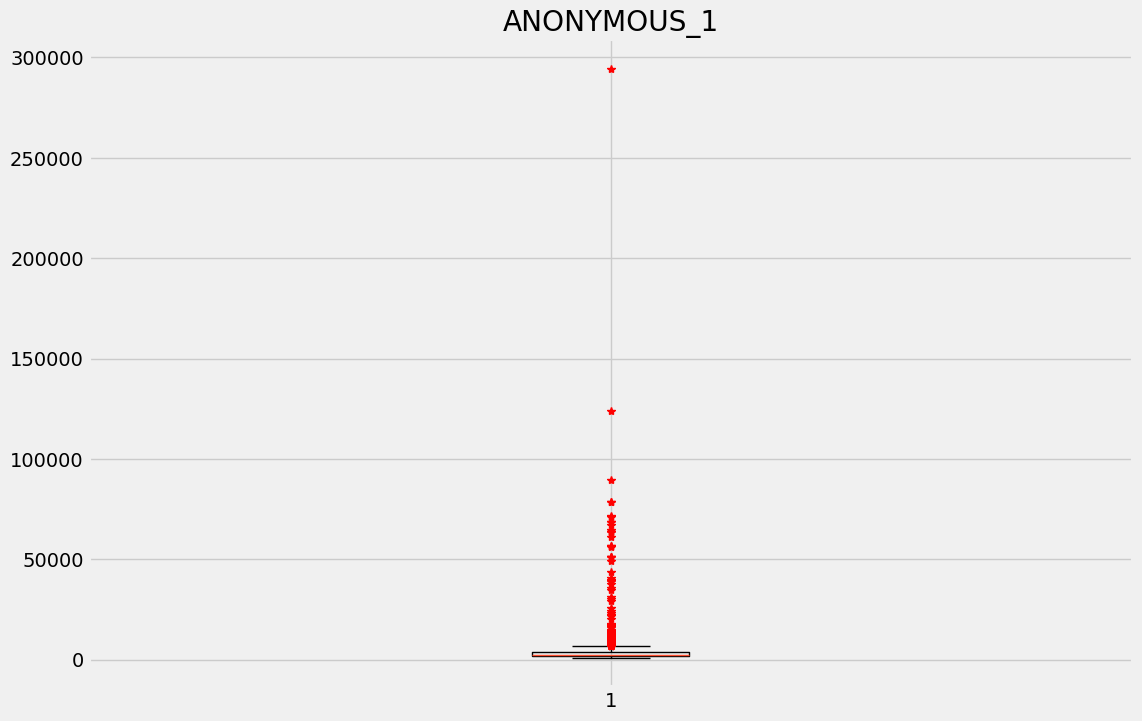

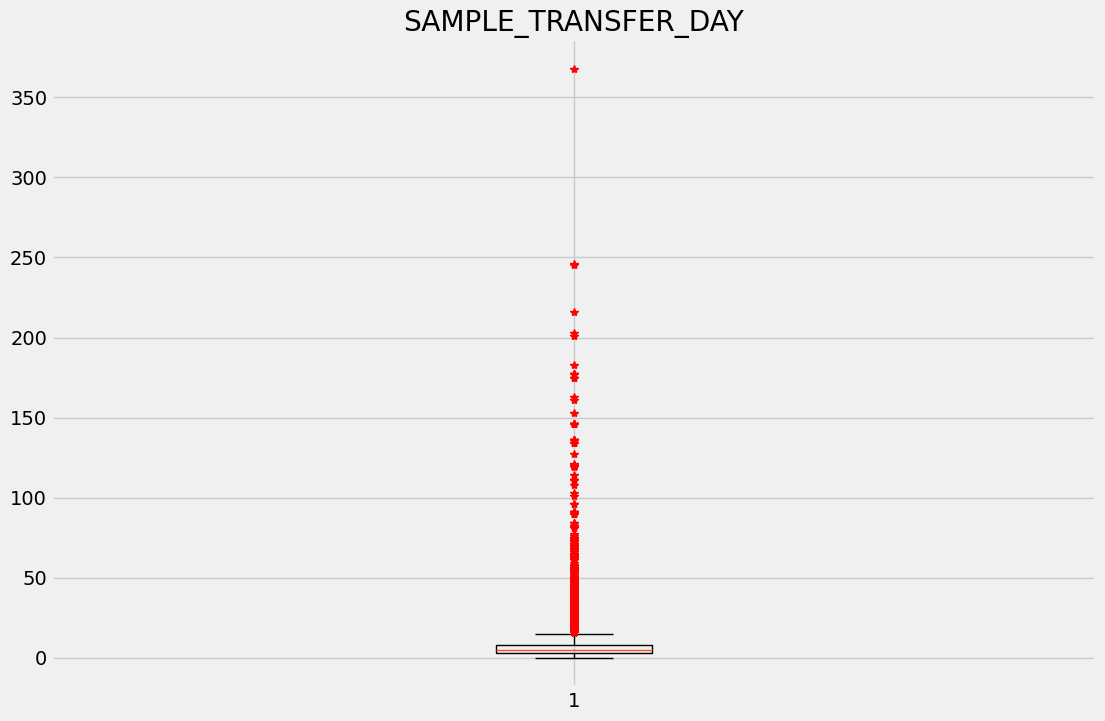

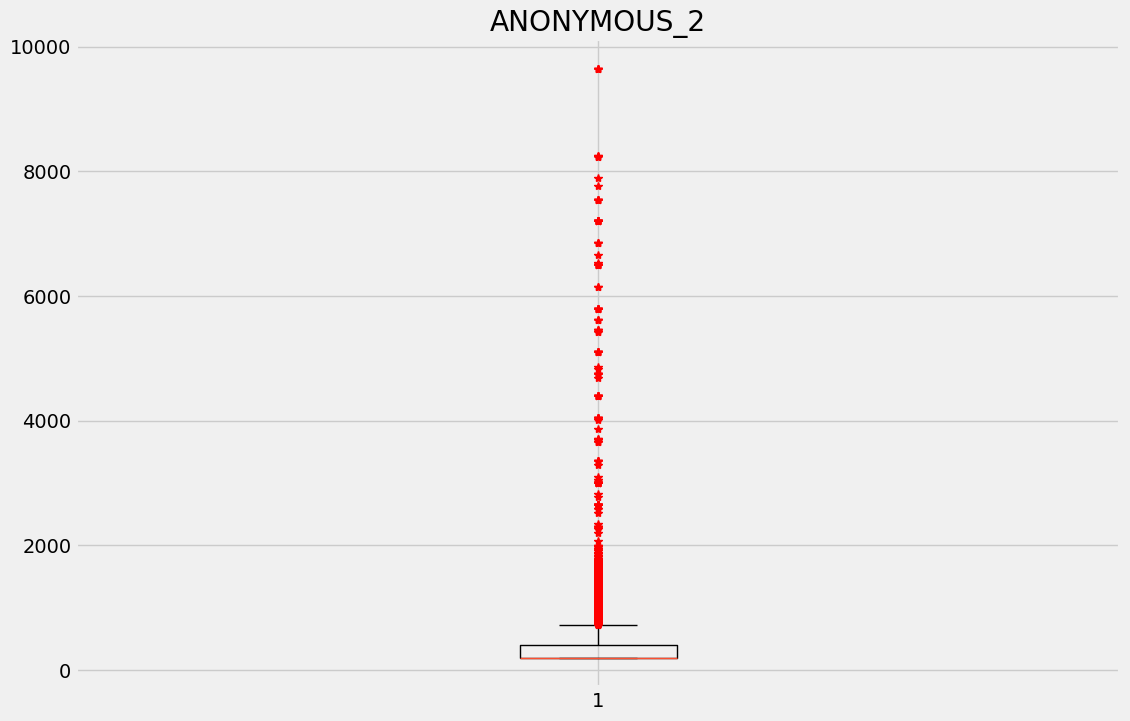

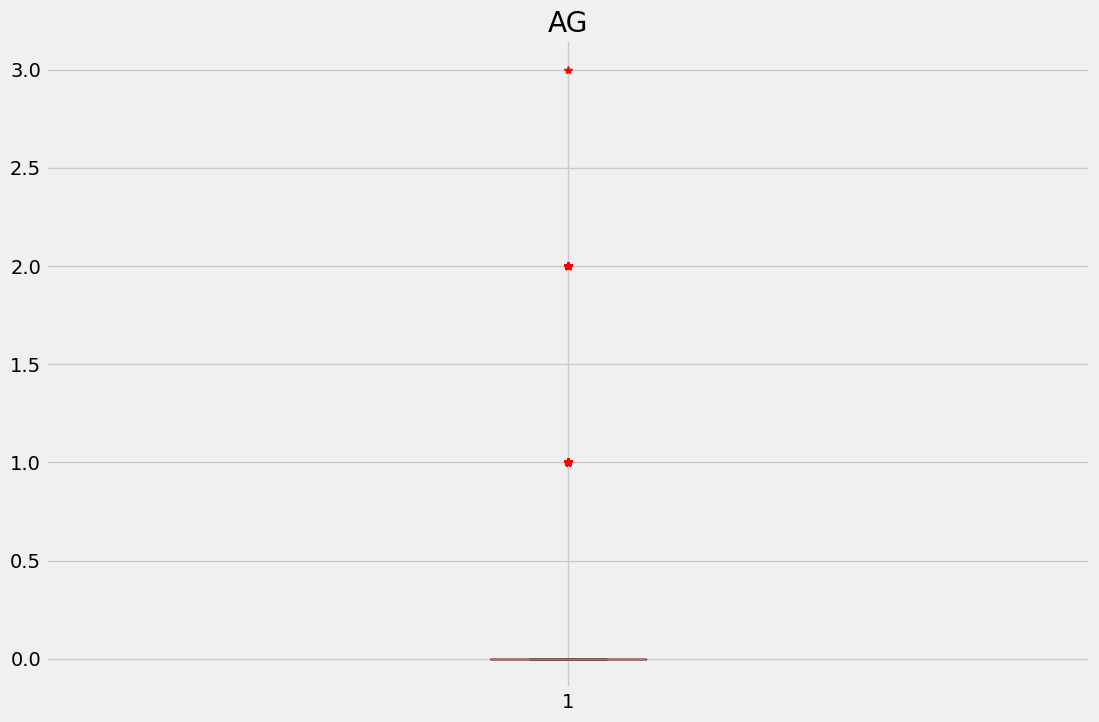

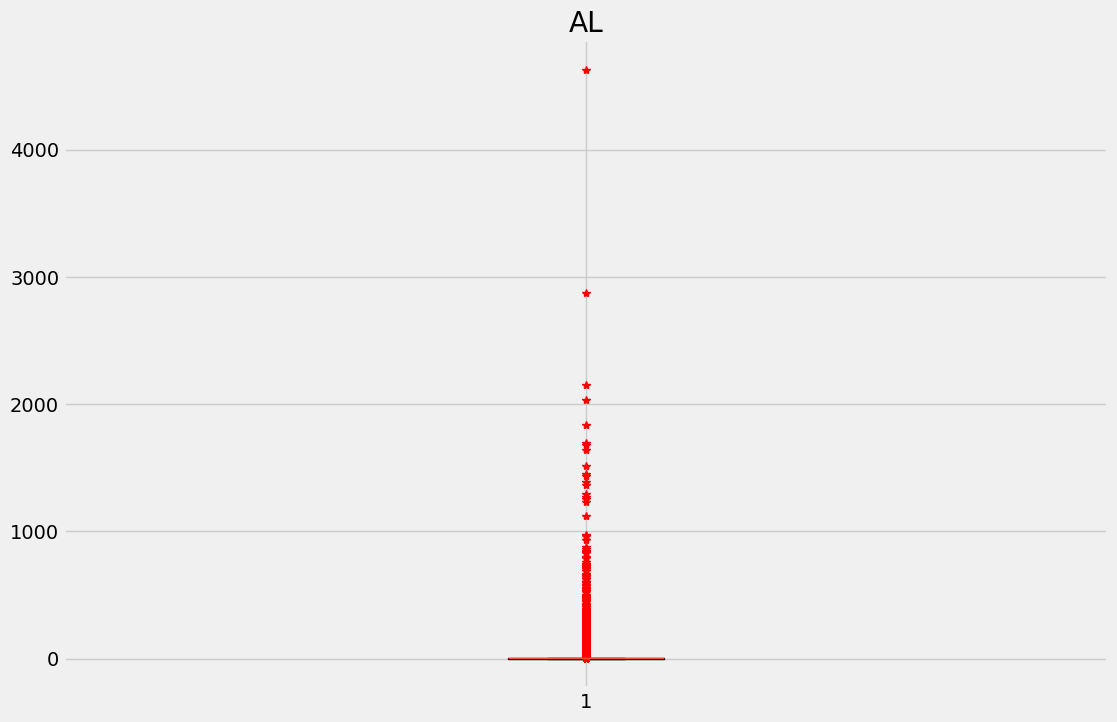

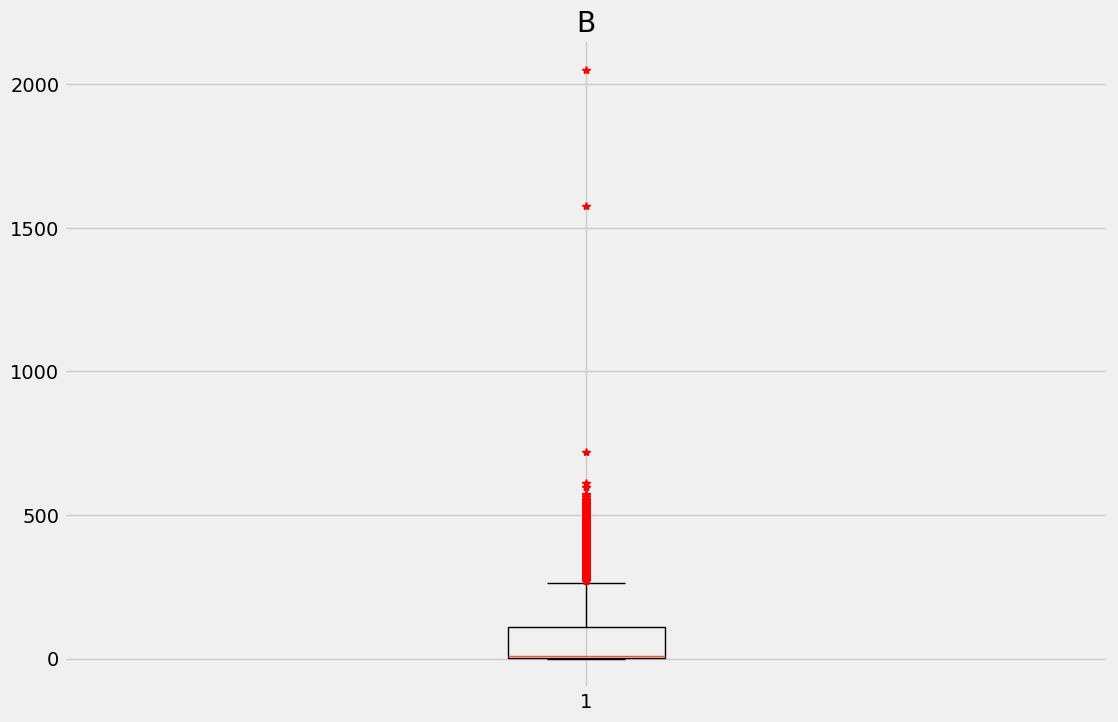

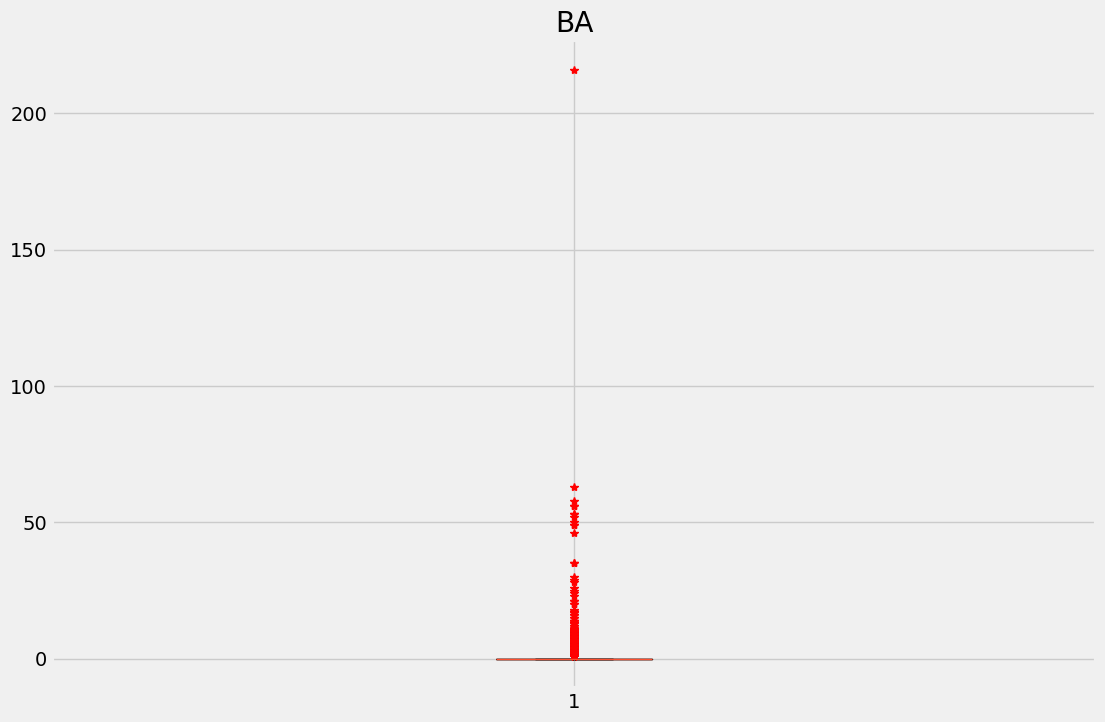

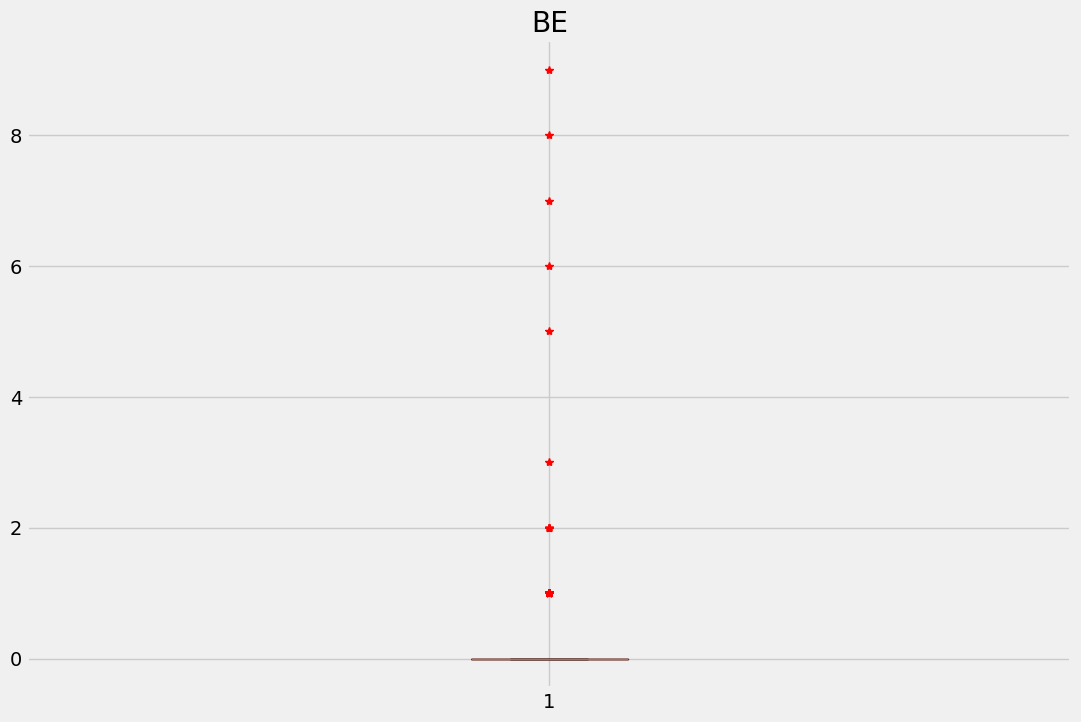

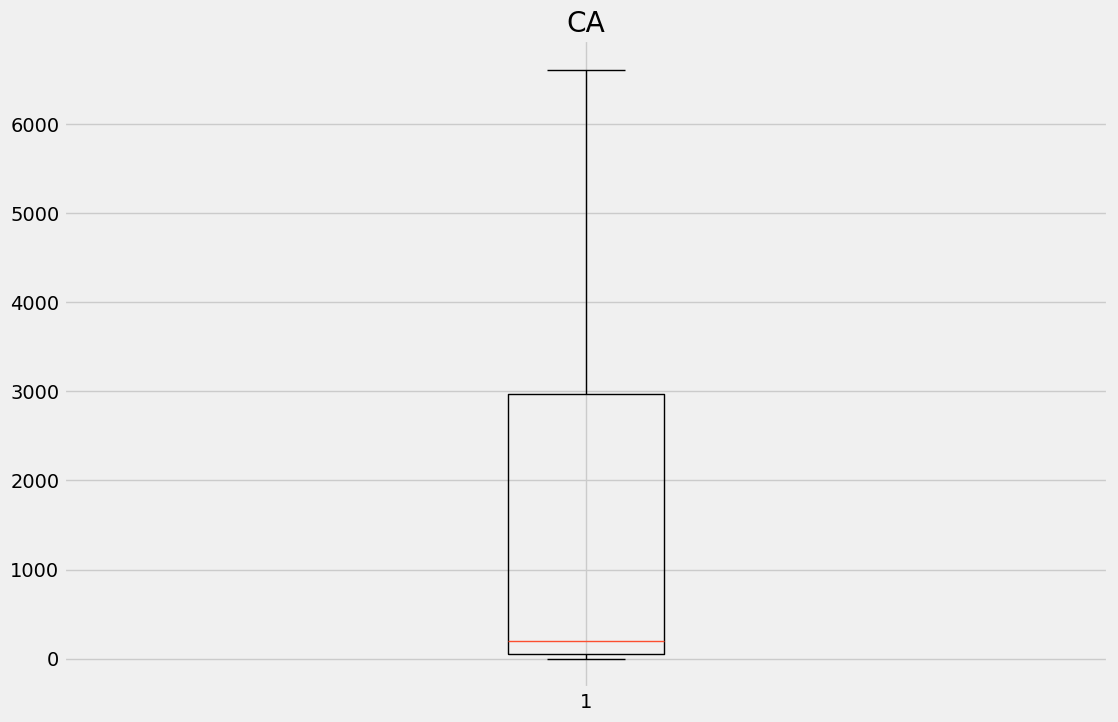

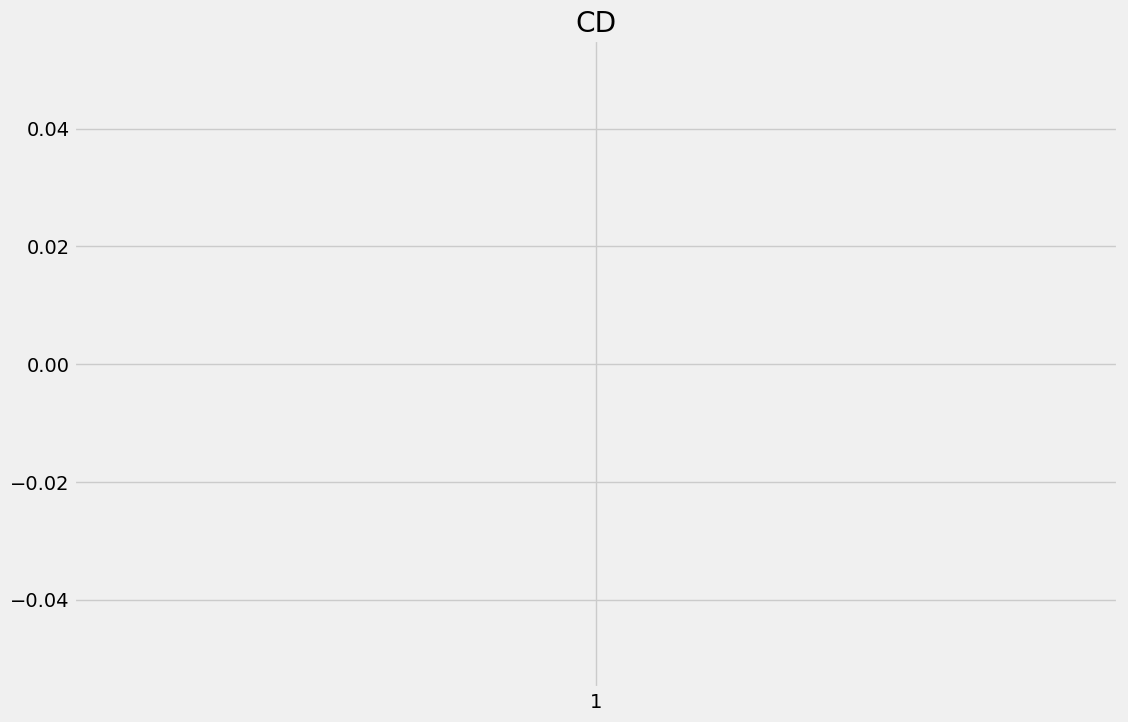

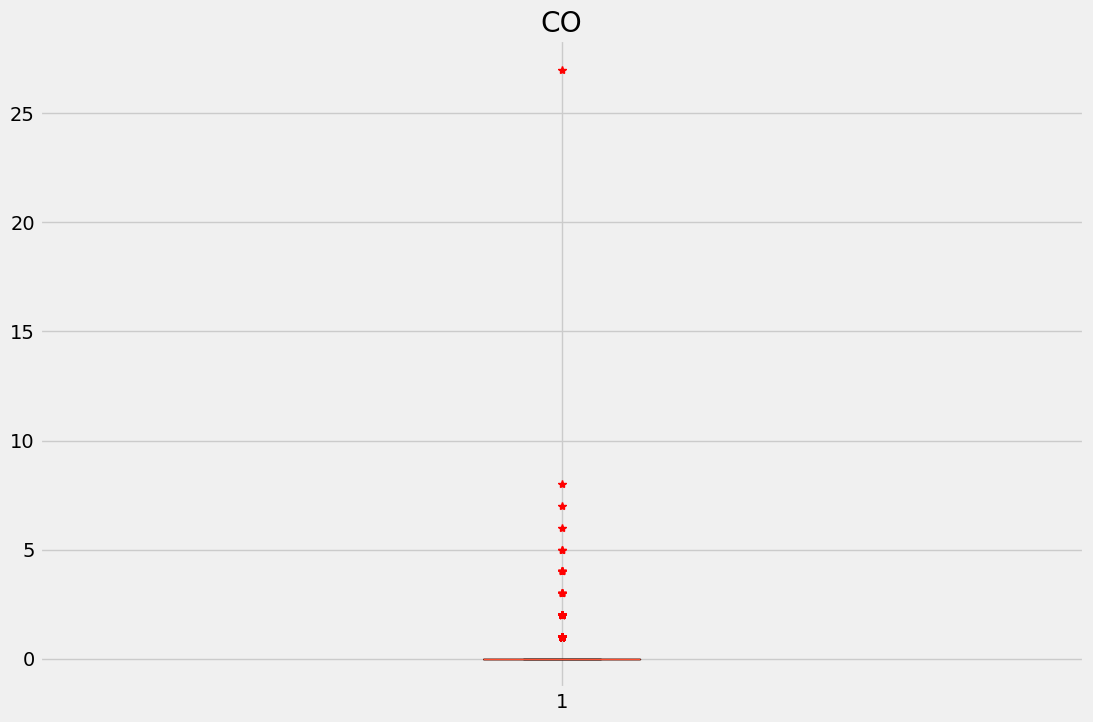

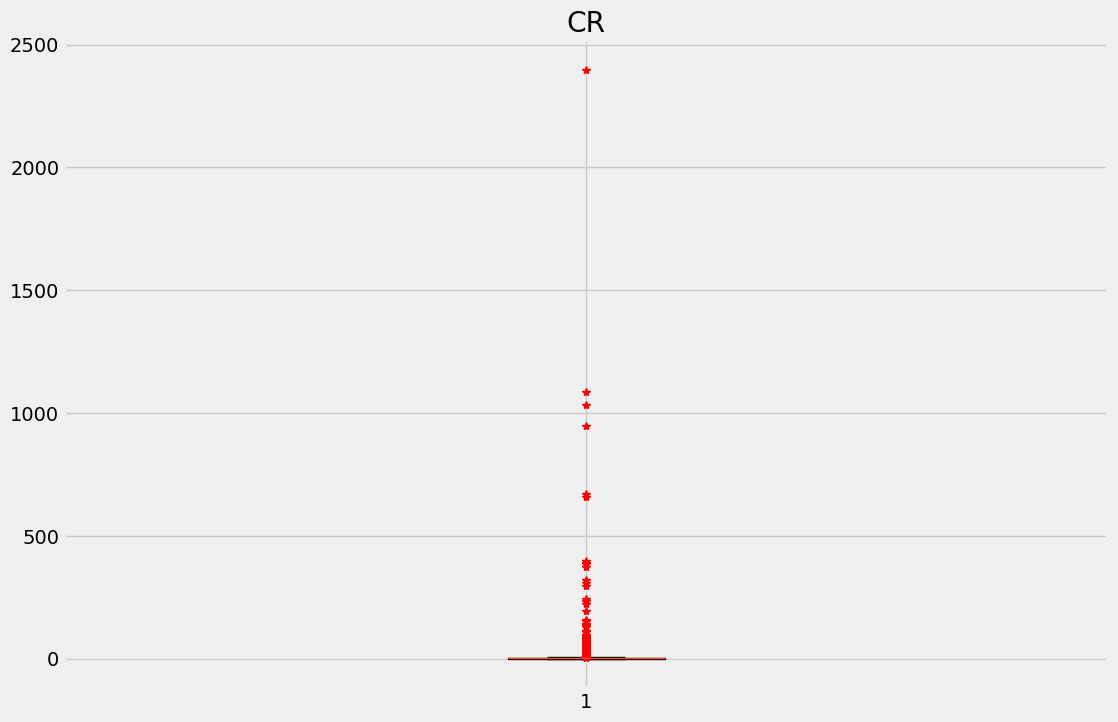

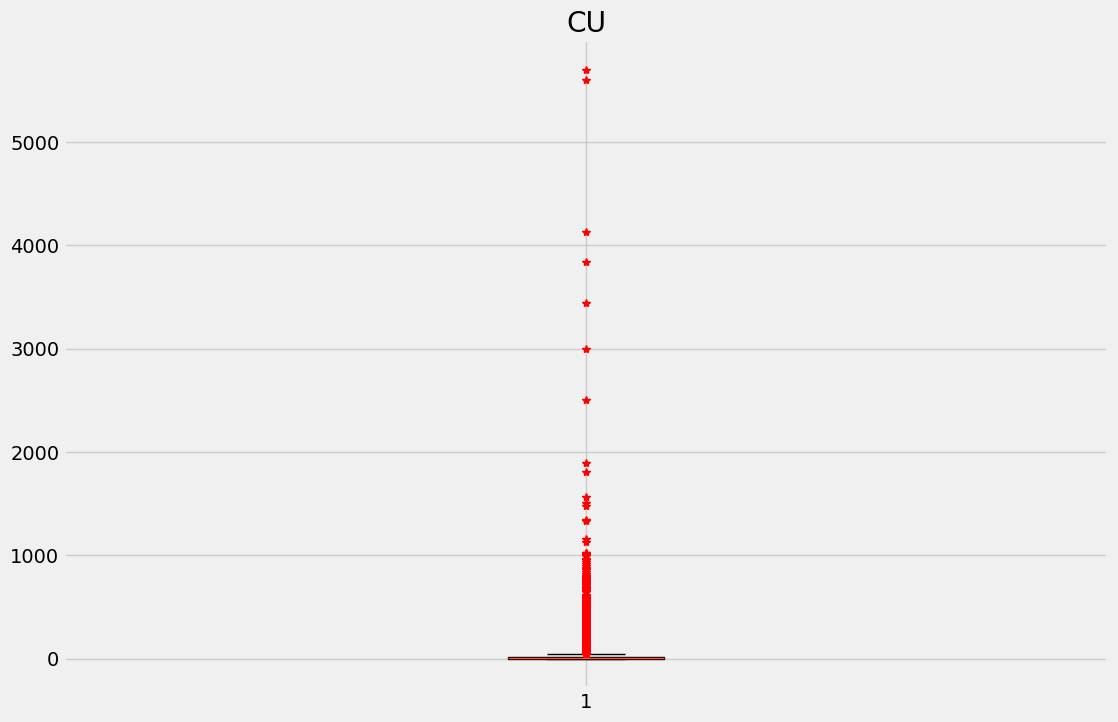

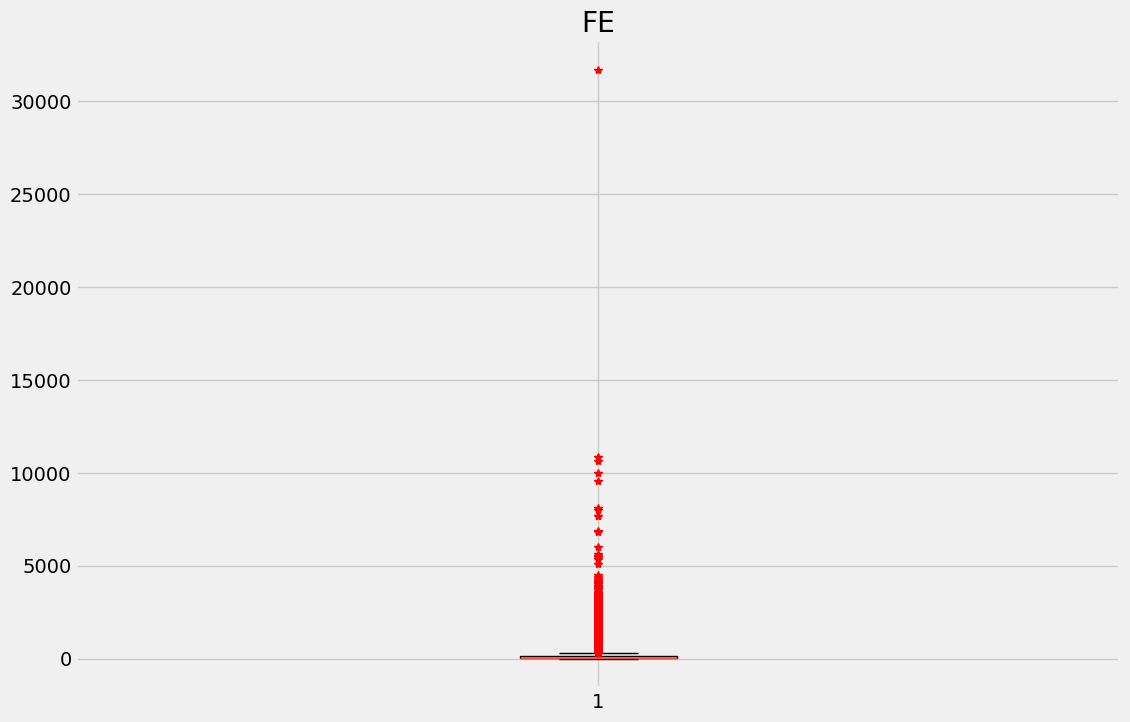

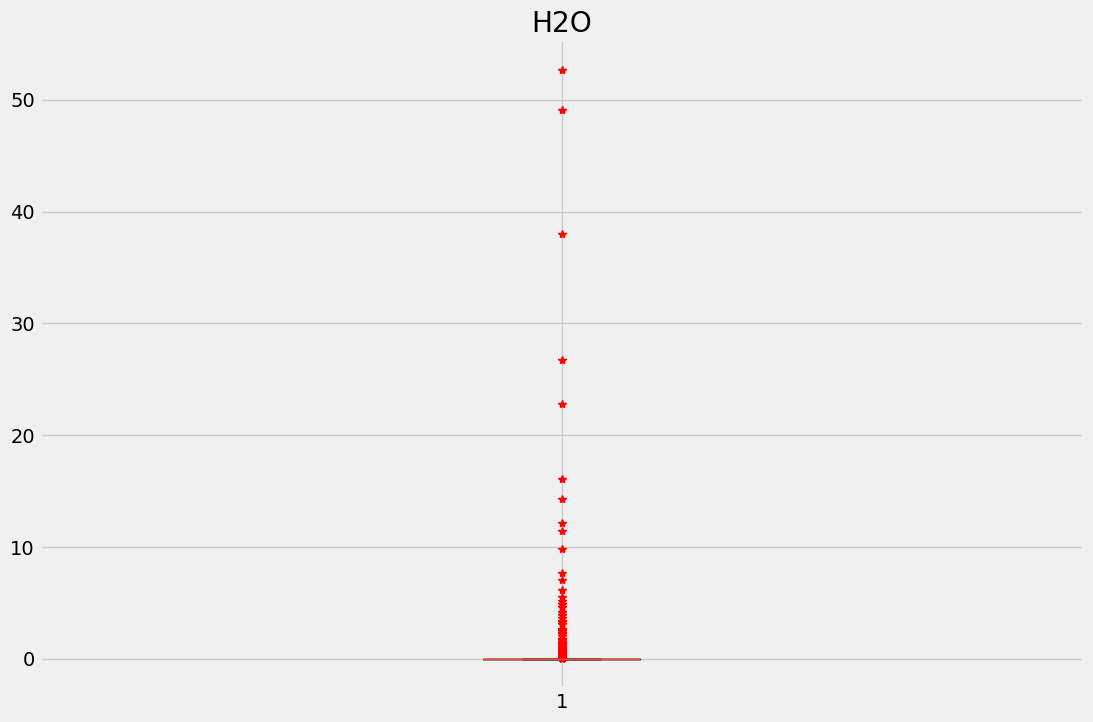

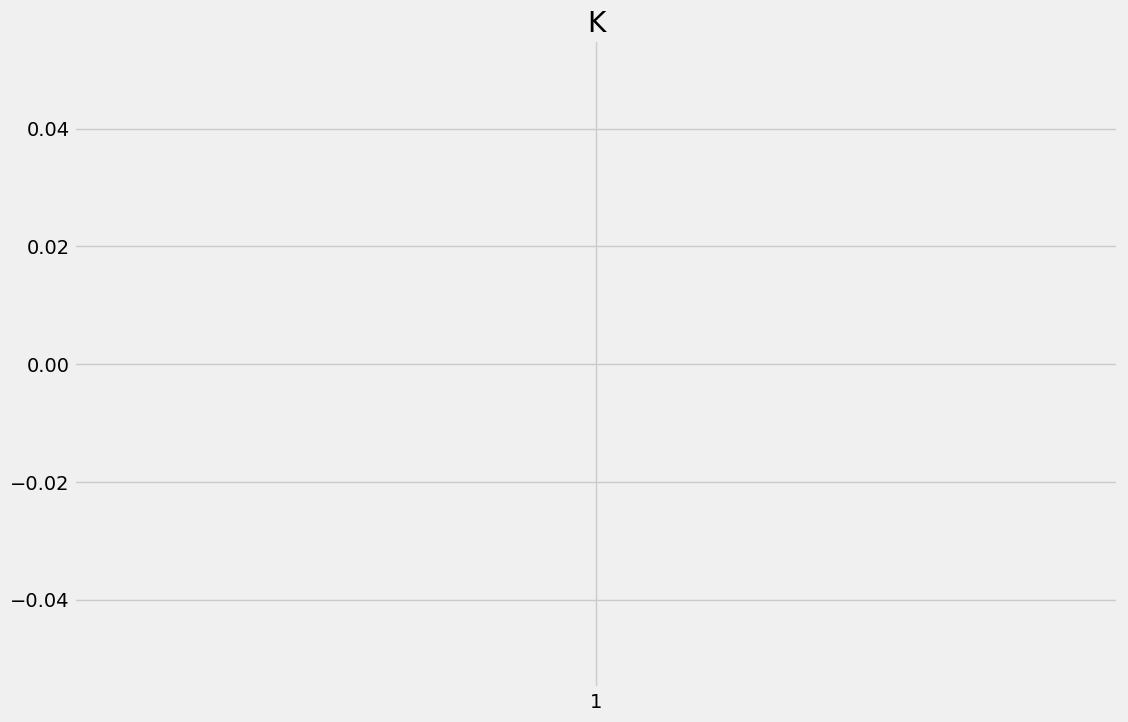

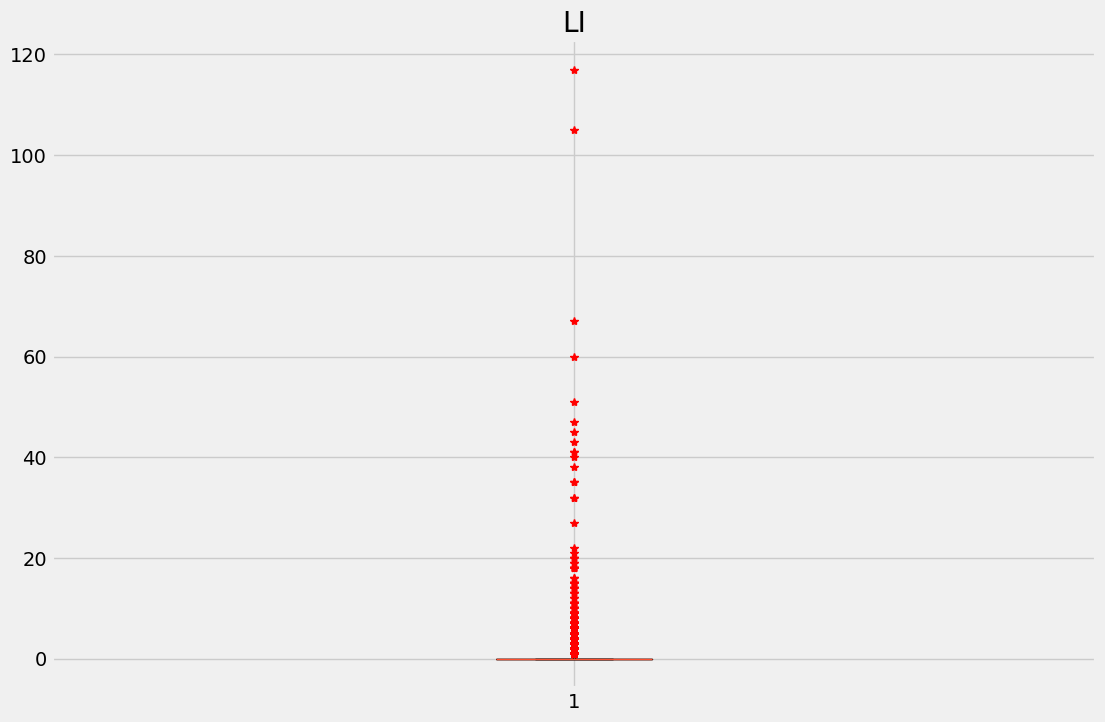

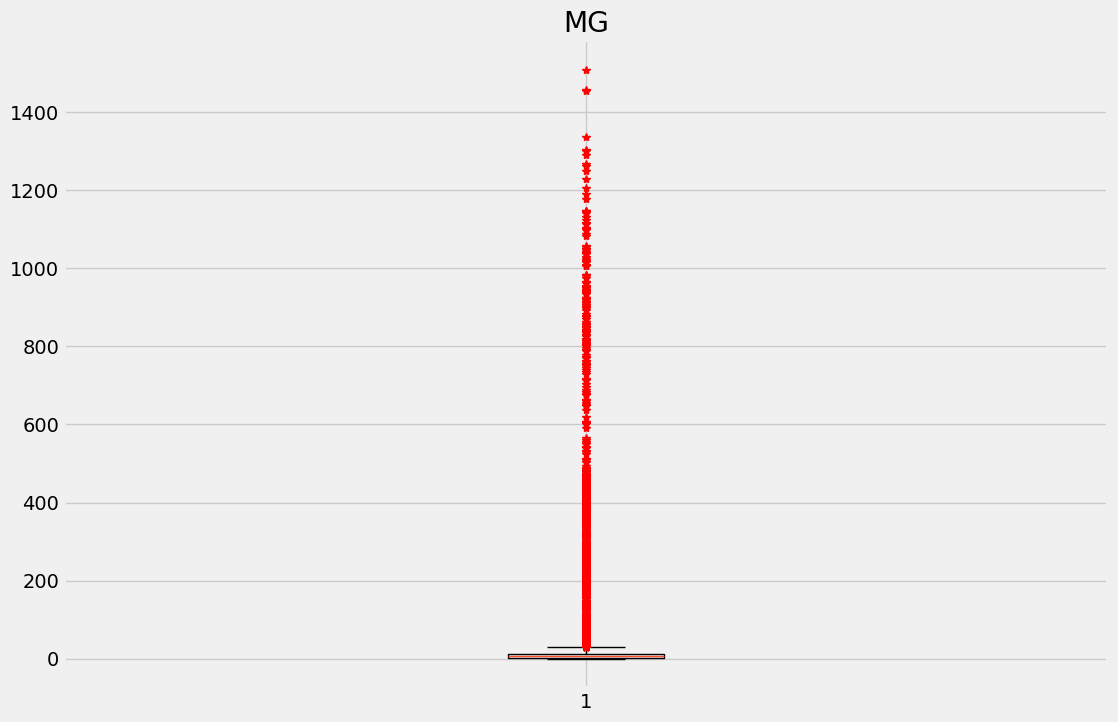

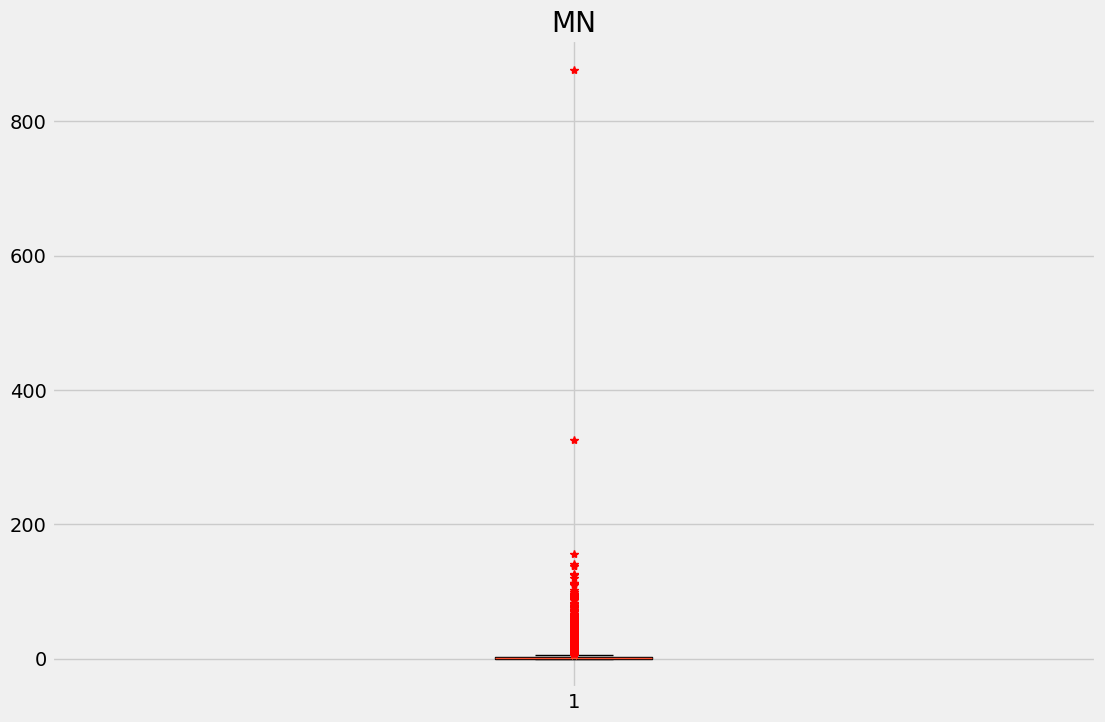

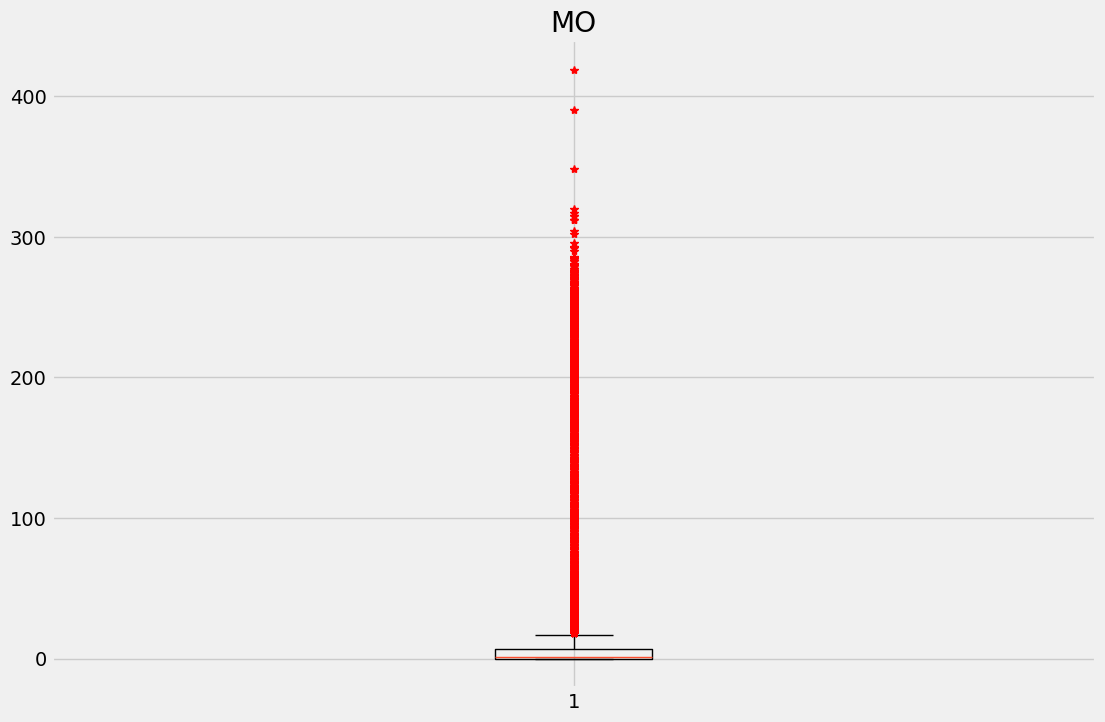

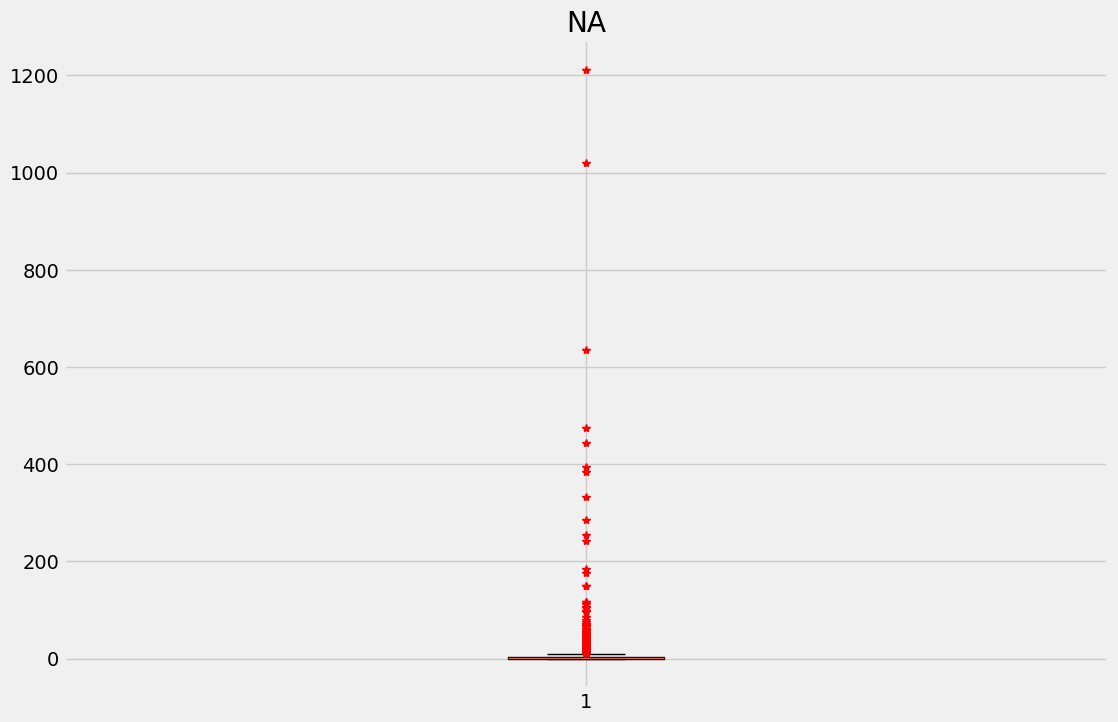

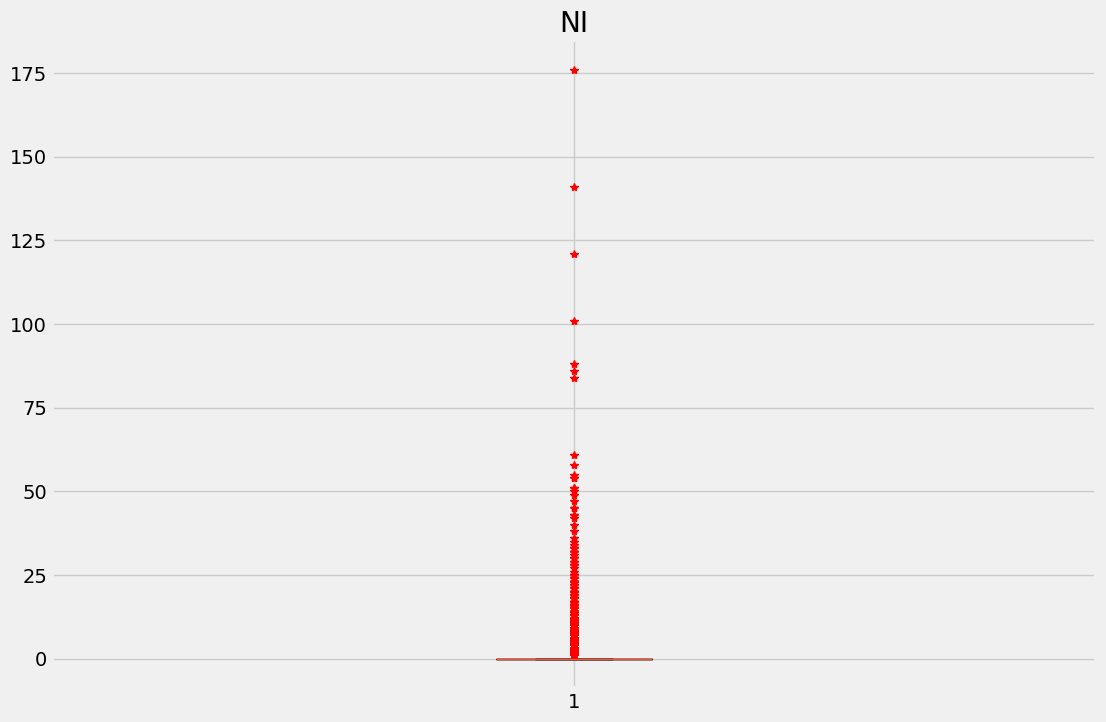

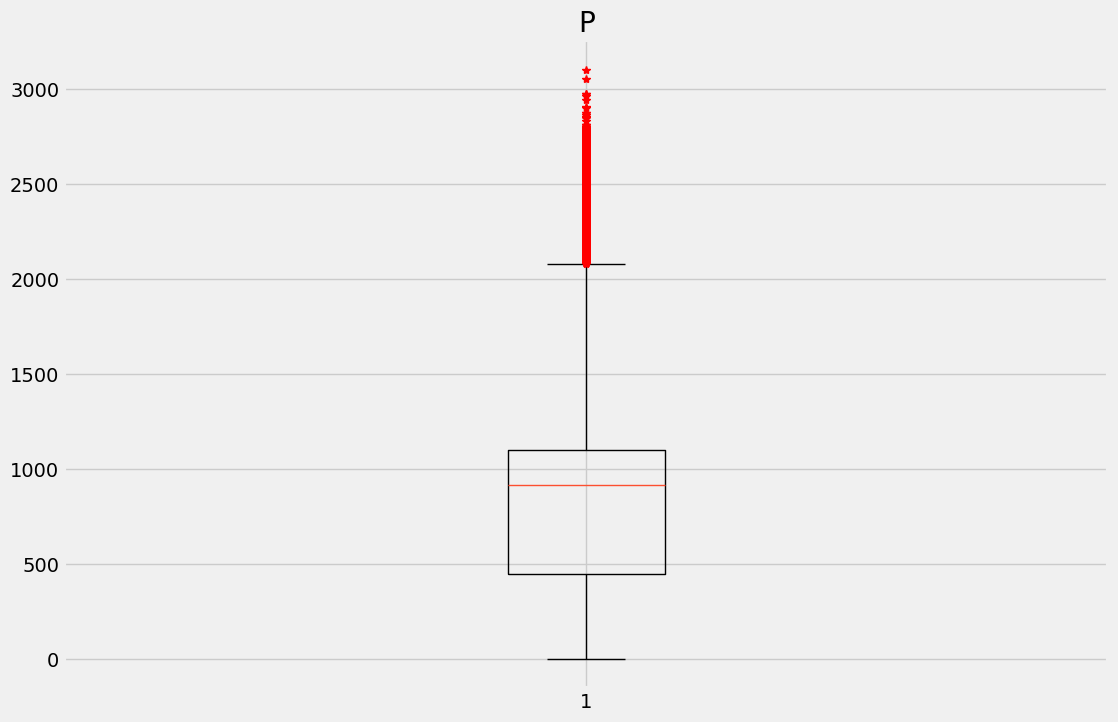

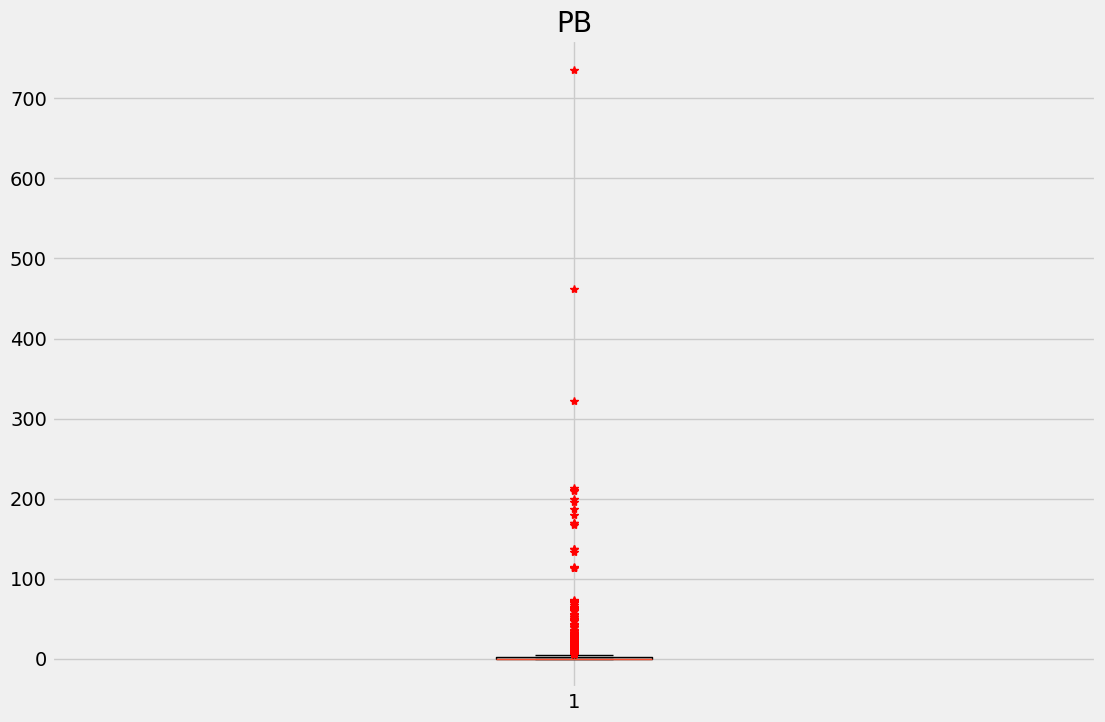

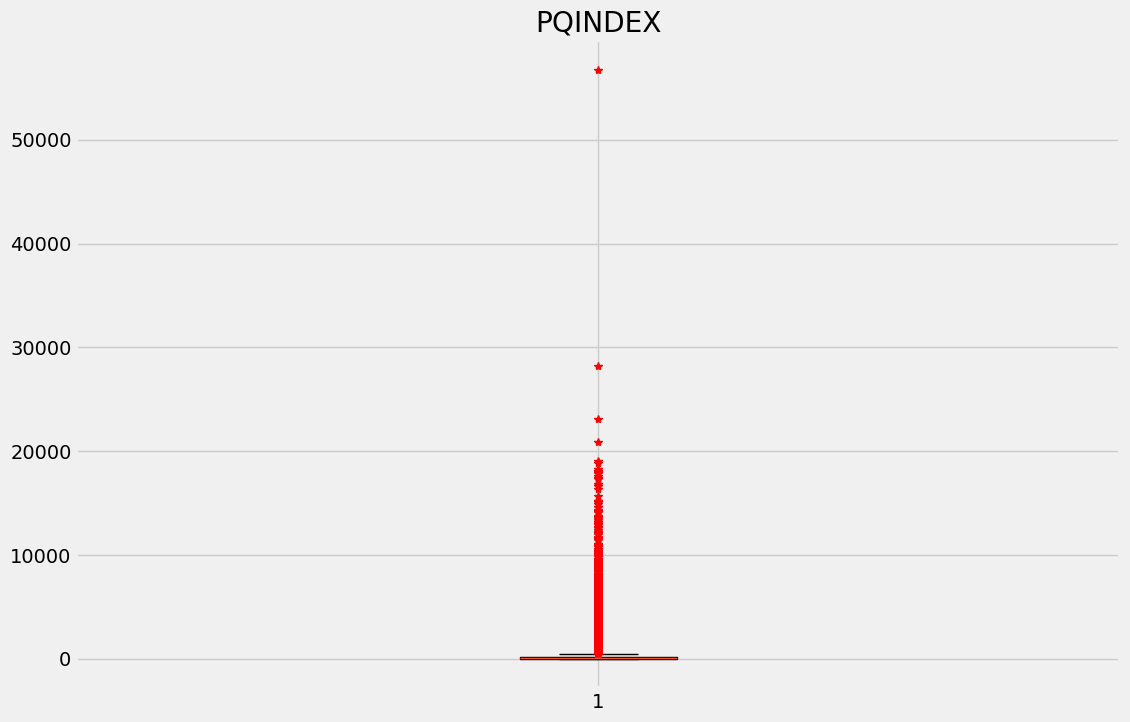

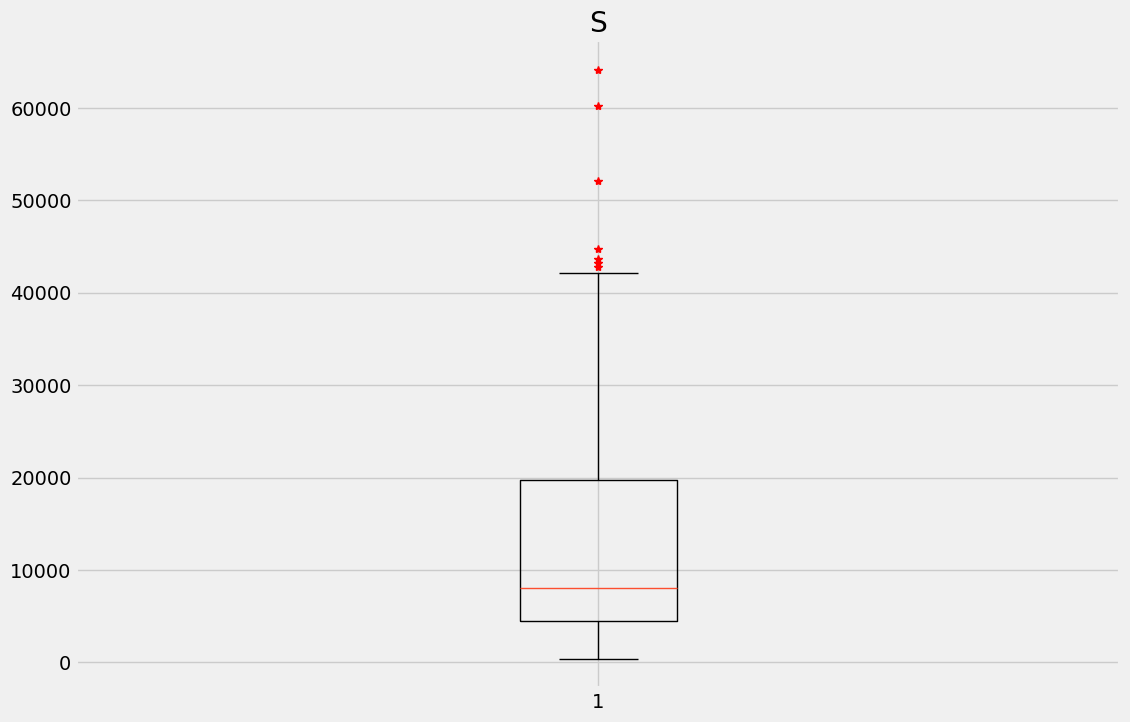

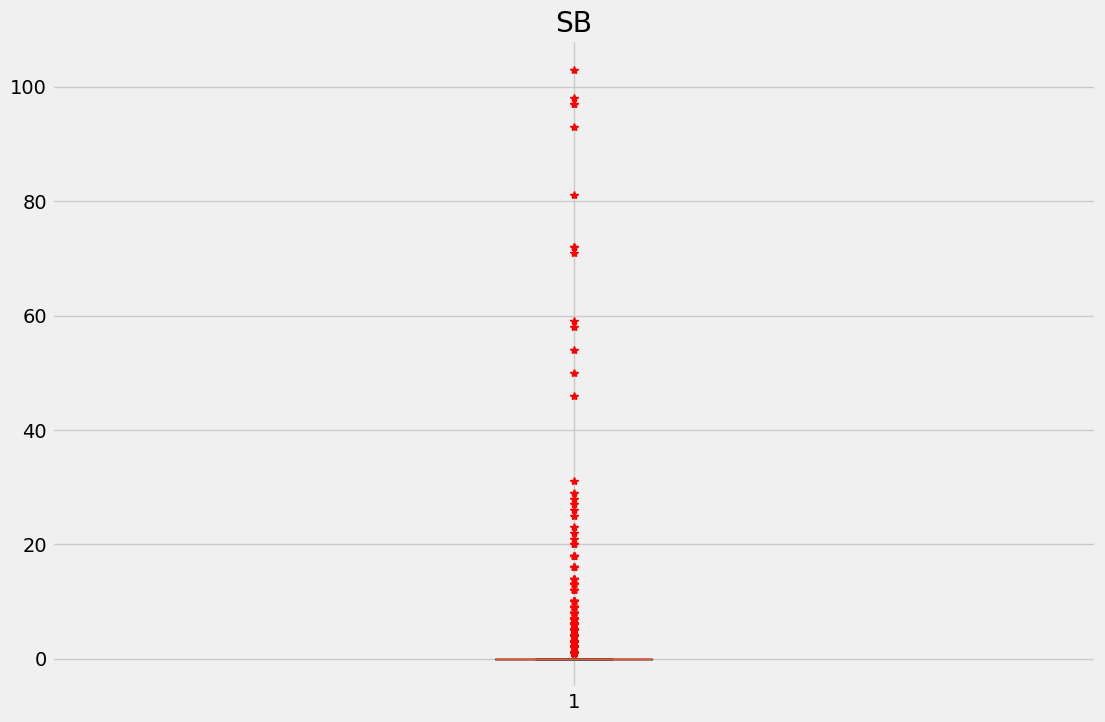

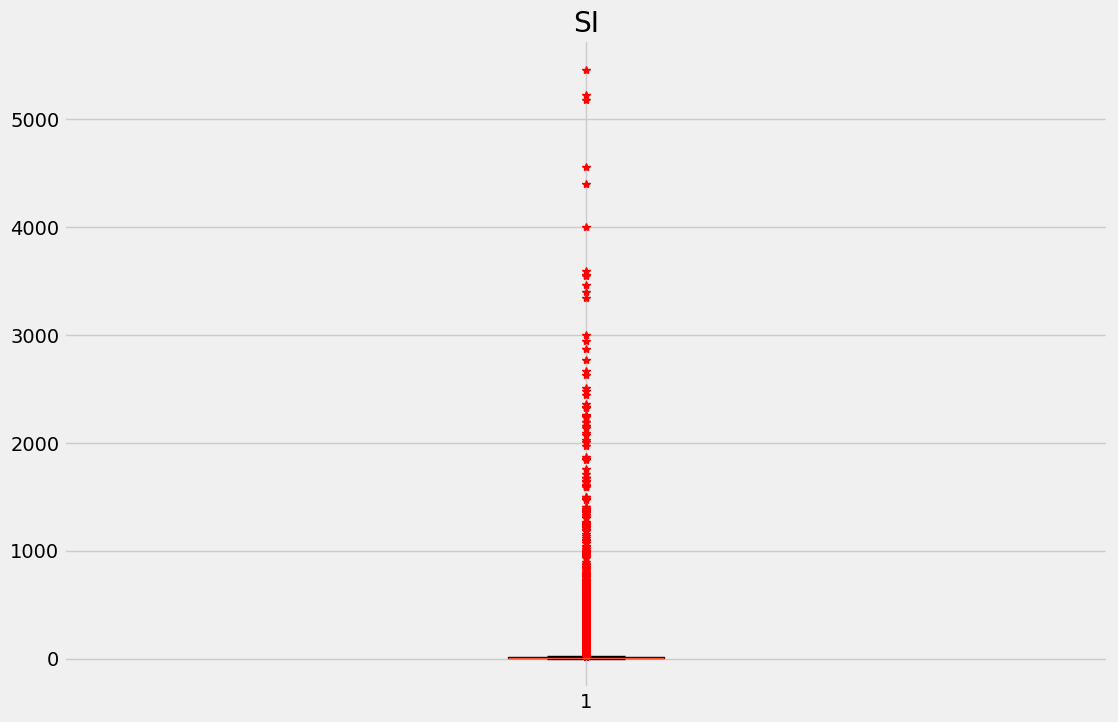

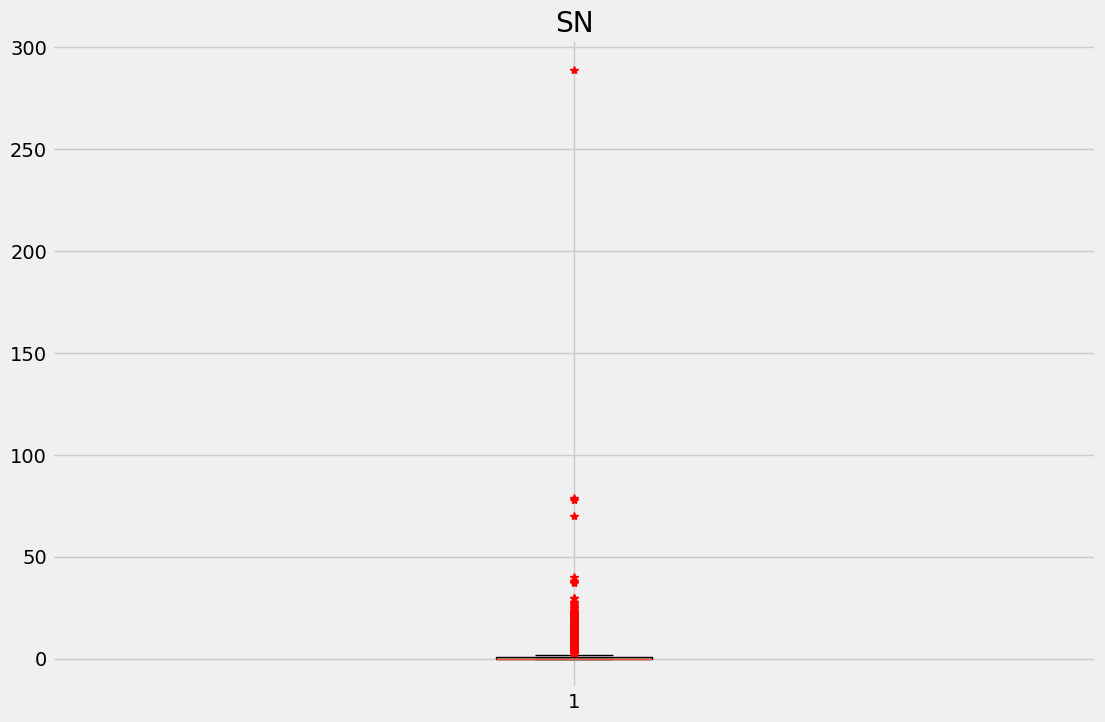

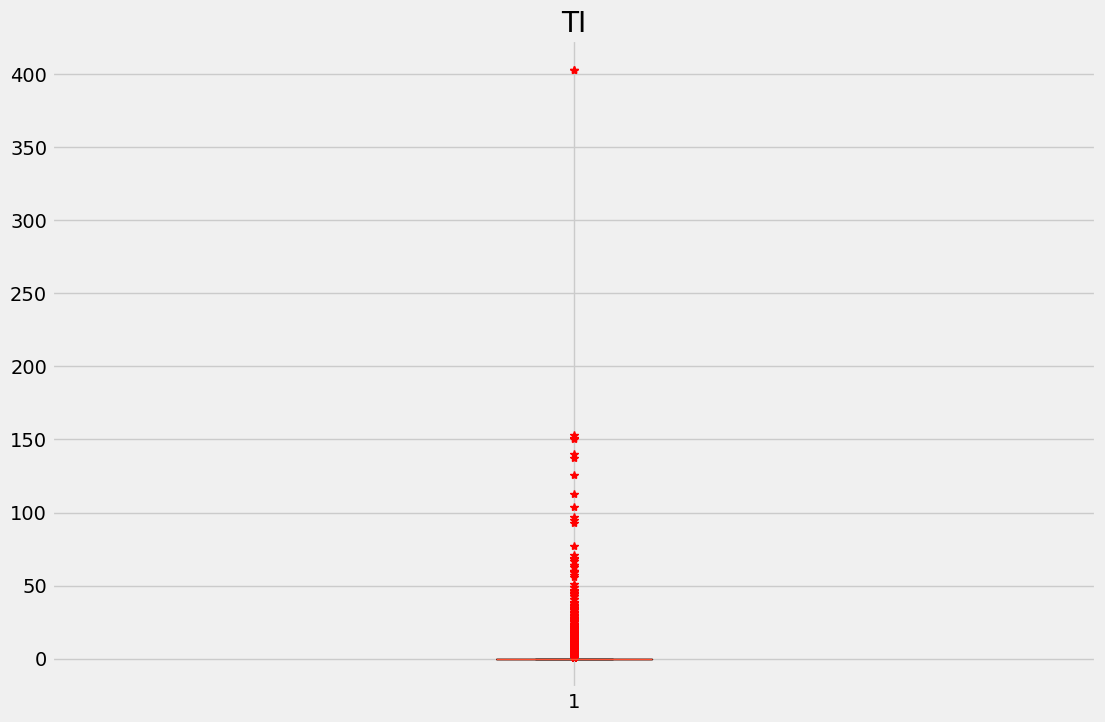

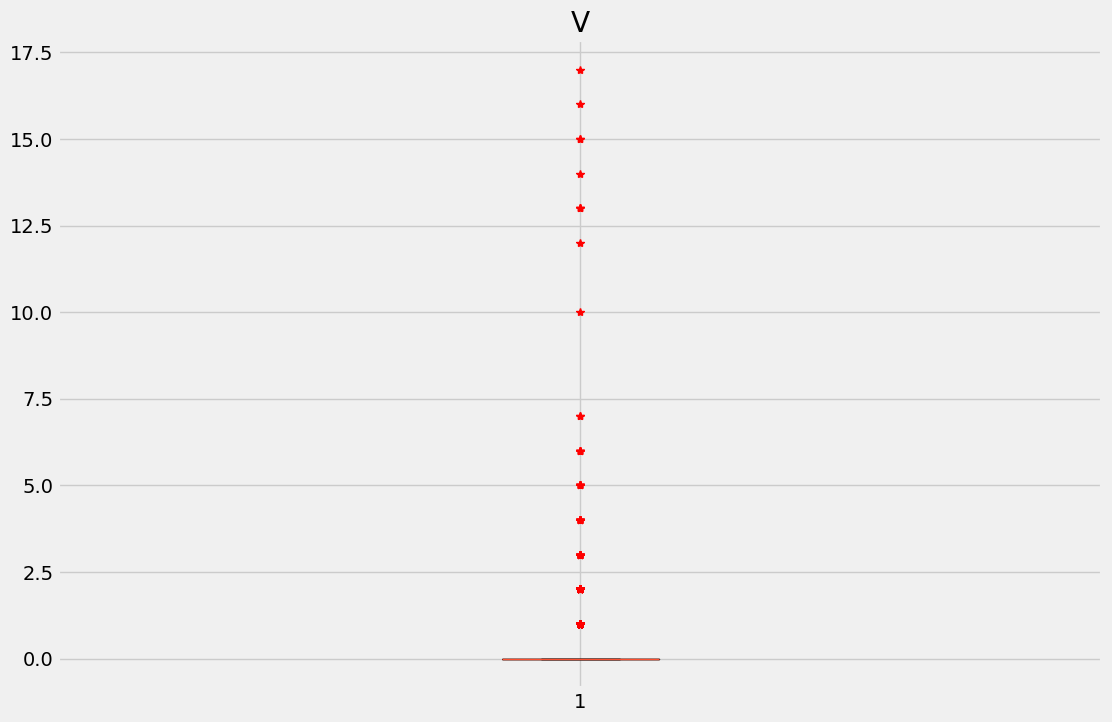

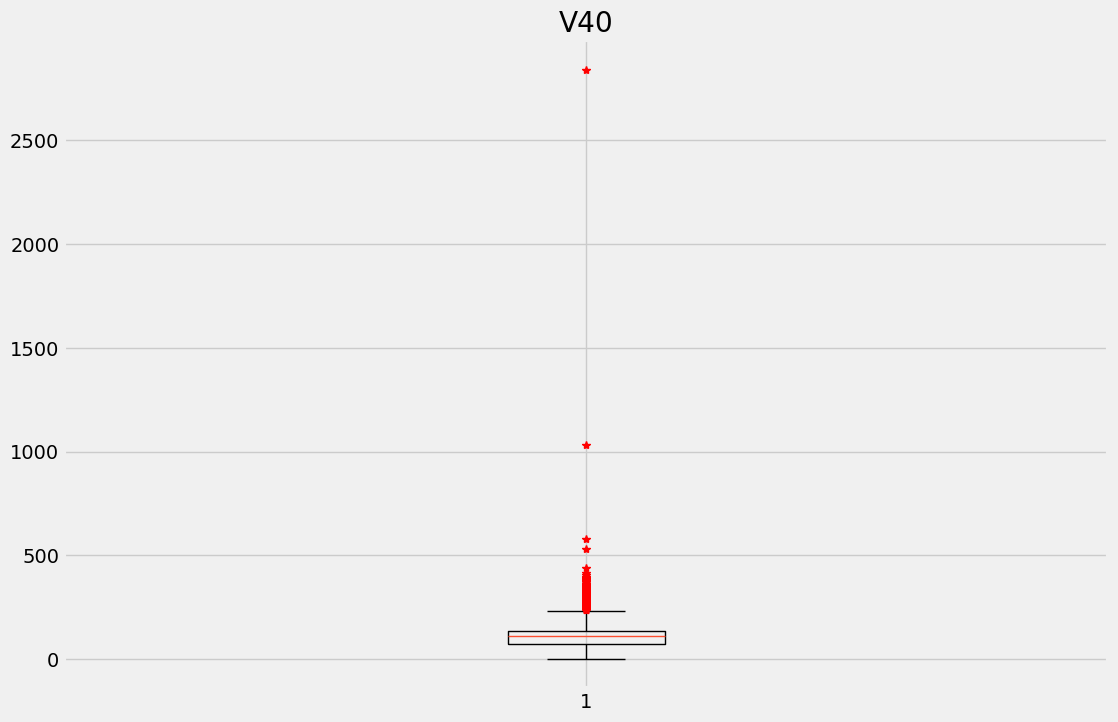

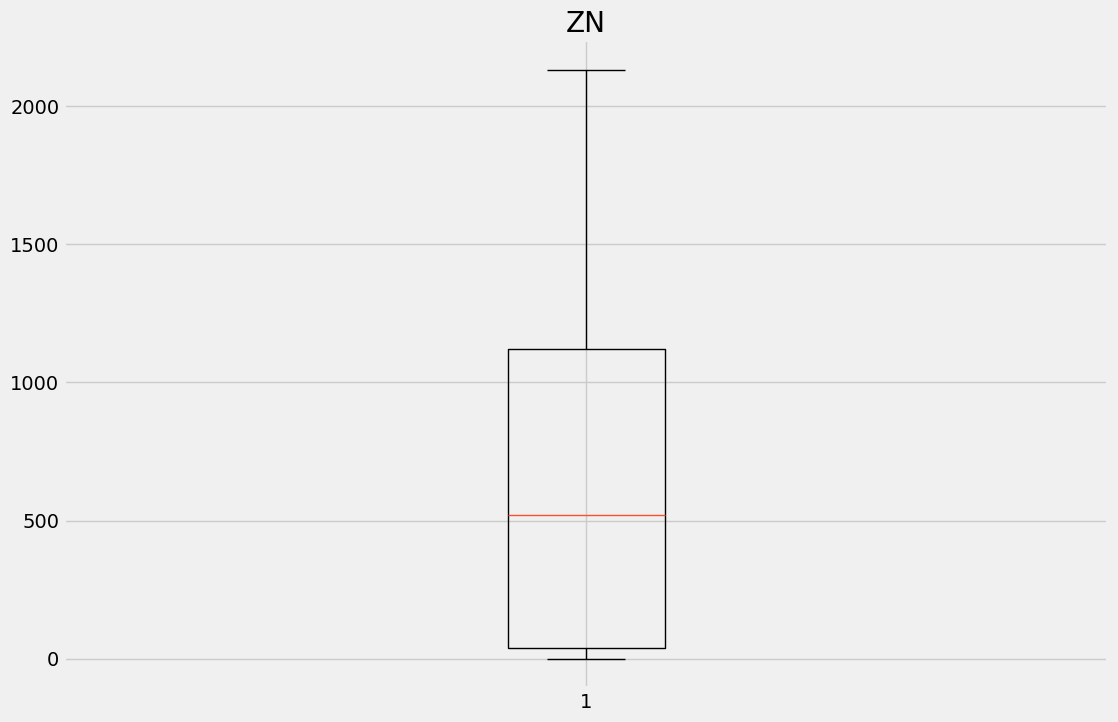

In [21]:
for col in numerical_features :
    plt.figure(figsize=(12, 8))
    plt.boxplot(train_df[col], sym='r*')
    plt.title(col)
    plt.show()

*    위의 boxplot을 참고하면 대부분의 데이터에서 Outlier 값이 매우 많은 것을 확인할 수 있다.
*    따라서 outlier 값을 제거하게 되면 데이터의 대부분이 소실되어 정확한 데이터 정보 파악이 불가능해 outlier 값을 포함해 데이터 시각화를 진행했다.

# 데이터 시각화

## Y_label 0과 1비율 확인

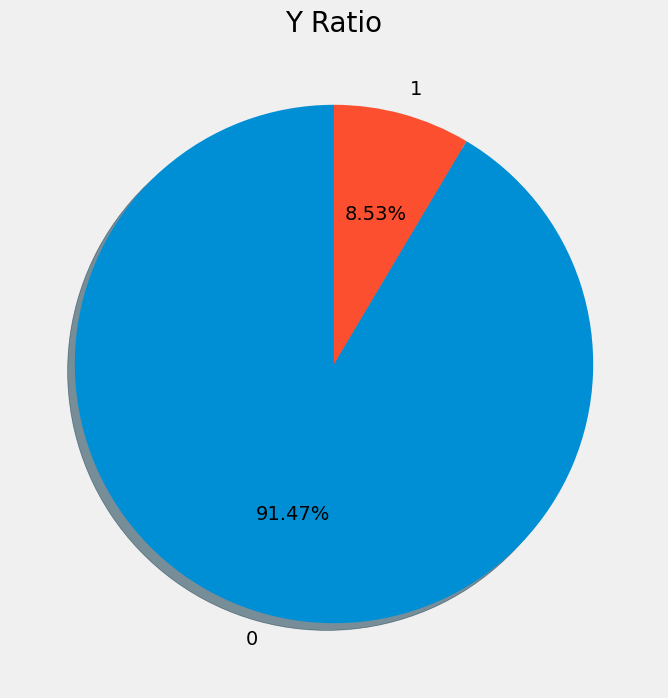

In [22]:
plt.subplots(figsize = (8,8))
plt.pie(train_df['Y_LABEL'].value_counts(), labels = train_df['Y_LABEL'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

*   데이터의 개수가 다르기 때문에 이를 반영한 그래프 해석이 필요하다.

# Feature 시각화

## Categorical feature

In [23]:
# 이상치 유무에 따른 차이를 보기 위한 데이터 분류
train_0 = train_df[train_df['Y_LABEL']==0]
train_1 = train_df[train_df['Y_LABEL']==1]

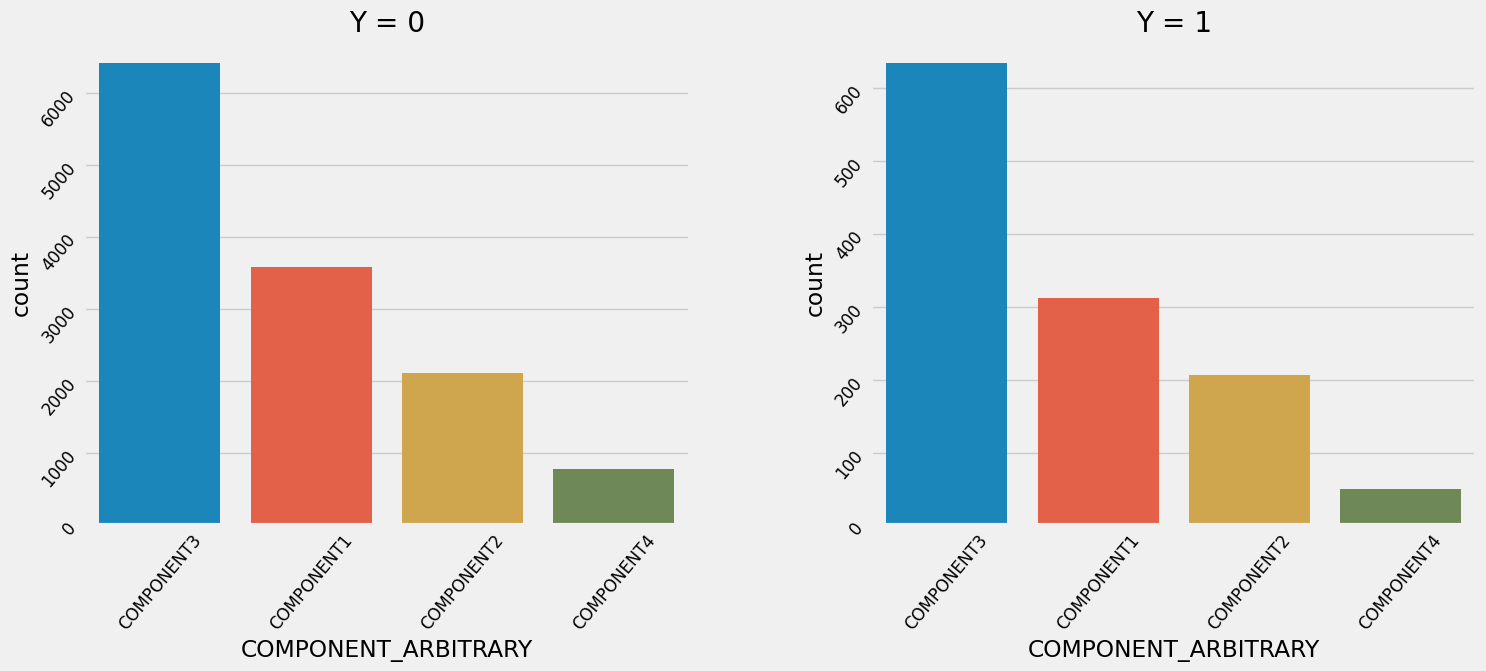

In [24]:
# 'COMPONENT_ARBITRARY' #Test Feature
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x = 'COMPONENT_ARBITRARY',
                data = train_0,
                ax = ax[0],
                order = train_0['COMPONENT_ARBITRARY'].value_counts().index)
ax[0].tick_params(labelsize=12)
ax[0].set_title('Y = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)


sns.countplot(x = 'COMPONENT_ARBITRARY',
              data = train_1,
              ax = ax[1],
              order = train_1['COMPONENT_ARBITRARY'].value_counts().index)
ax[1].tick_params(labelsize=12)
ax[1].set_title('Y = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


*   'COMPONENT_ARBITRARY'에 따른 Y 값의 차이는 존재하지 않는다고 볼 수 있다.


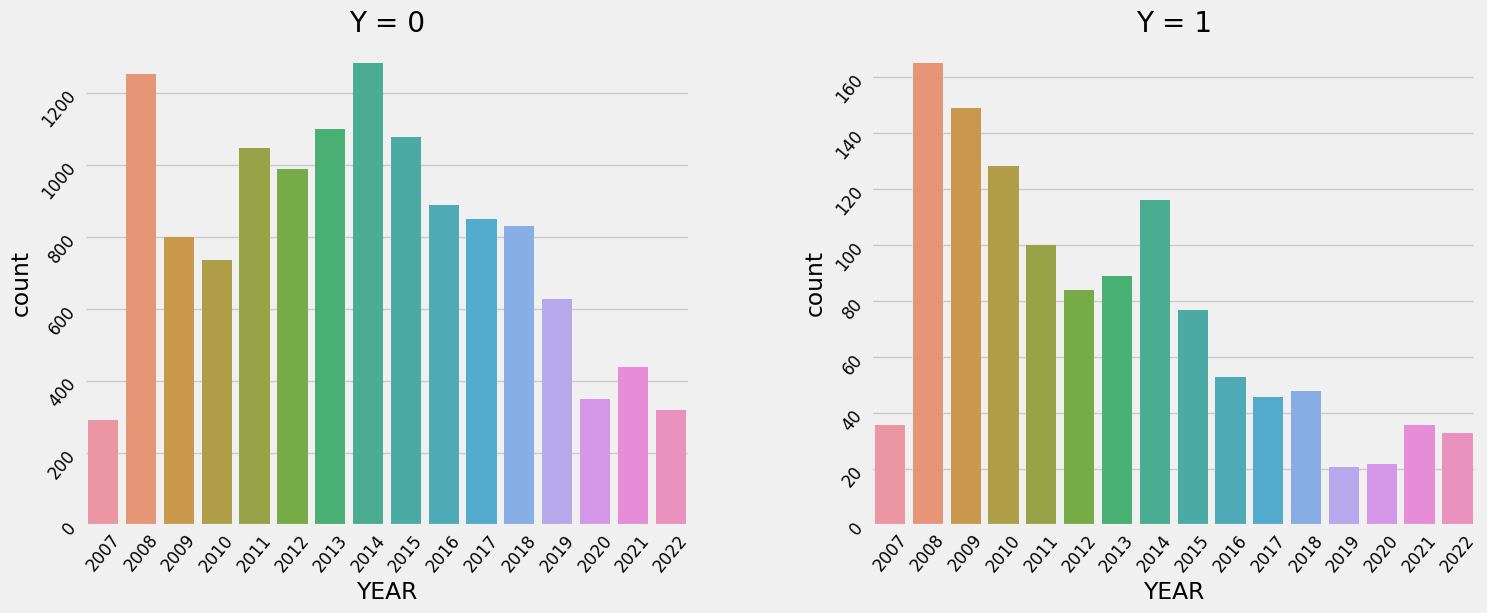

In [25]:
# 'Year' #Test Feature
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x = 'YEAR',
                data = train_0,
                ax = ax[0])
ax[0].tick_params(labelsize=12)
ax[0].set_title('Y = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)


sns.countplot(x = 'YEAR',
              data = train_1,
              ax = ax[1])
ax[1].tick_params(labelsize=12)
ax[1].set_title('Y = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

*   'YEAR'에 따른 Y는 년도별로 편차가 있음을 확인할 수 있다.



## Numerical feature


In [26]:
# Numerical 그래프 함수 정의
def num_plot(train, train_0, train_1, column):
  
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    if column in test_features :
        color = 'red'
    else :
        color = 'blue'

    sns.distplot(train_0[column], color = color,
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('Y = 0')
    axes[0].set_ylabel('count')
    axes[0].set_xlim(None,train[column].max())

    sns.distplot(train_1[column], color = color,
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('Y = 1')
    axes[1].set_ylabel('count')
    axes[1].set_xlim(None,train[column].max())


    plt.subplots_adjust(wspace=0.3, hspace=0.3)

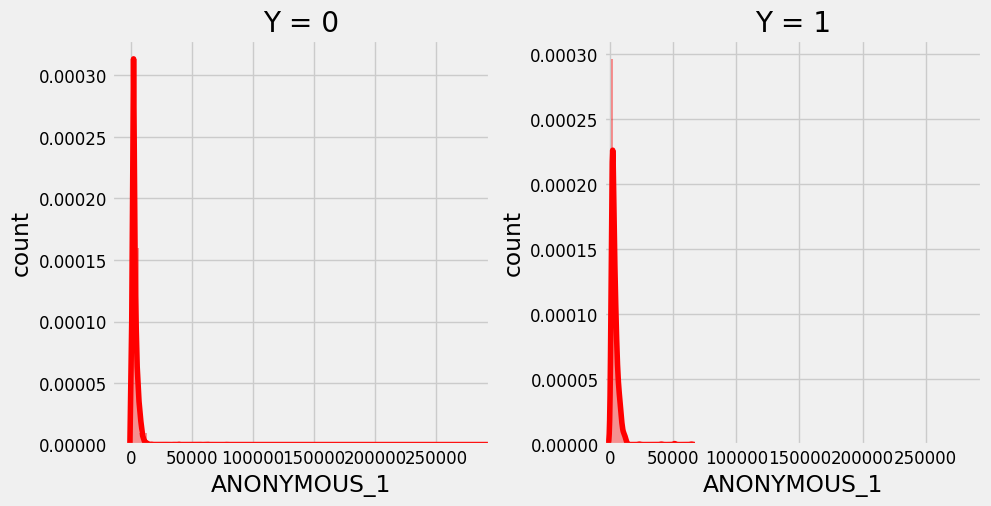

In [27]:
num_plot(train_df, train_0, train_1,'ANONYMOUS_1')

*    Y = 0인 경우에 `ANONYMOUS_1`가 0에 가까운 데이터의 수가 더 많았다.
*    또한 Y = 0인 경우의 outlier 편차가 더 크다는 사실을 확인할 수 있다.


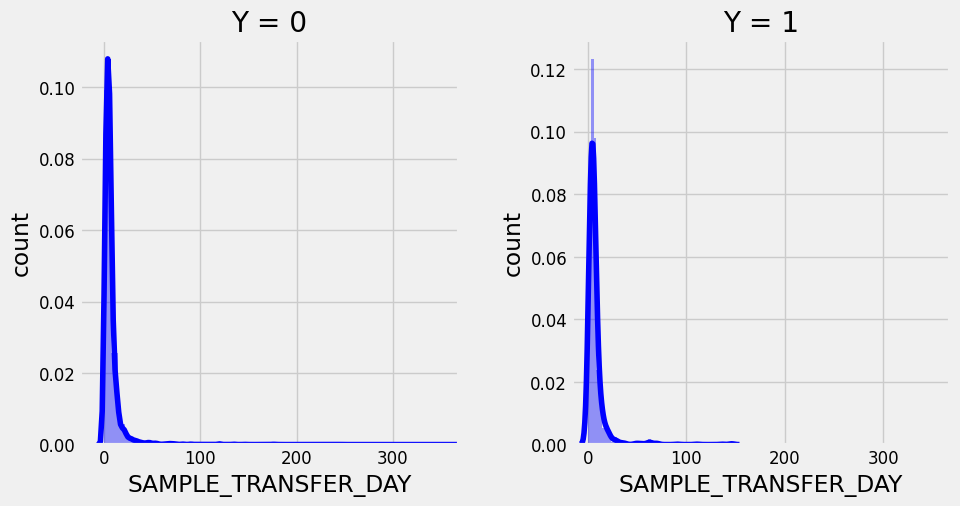

In [28]:
num_plot(train_df, train_0, train_1,'SAMPLE_TRANSFER_DAY')


*    Y = 0인 경우에 `SAMPLE_TRANSFER_DAY`가 0에 가까운 데이터의 수가 더 많았다.
*    또한 Y = 0인 경우의 outlier 편차가 더 크다는 사실을 확인할 수 있다.

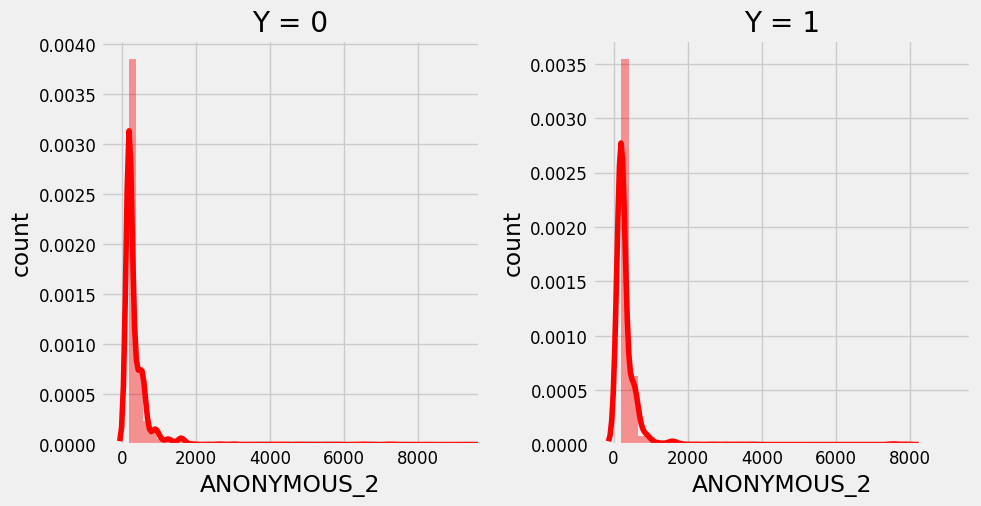

In [29]:
num_plot(train_df, train_0, train_1,'ANONYMOUS_2')

*    Y = 0인 경우에 `ANONYMOUS_2`가 0에 가까운 데이터의 수가 더 많았다.


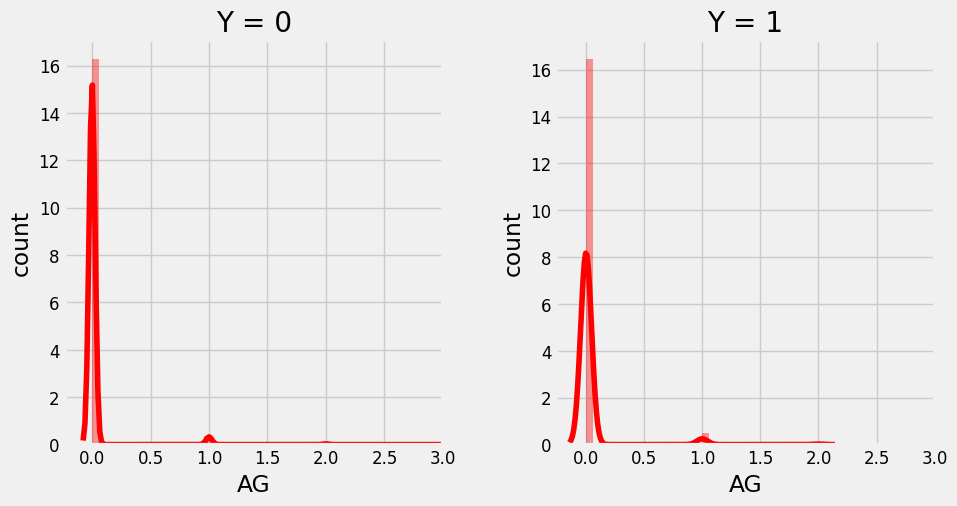

In [30]:
num_plot(train_df, train_0, train_1,'AG')

*    Y = 0일 때, 은의 양이 0에 가까운 데이터가 많음을 확인할 수 있다.


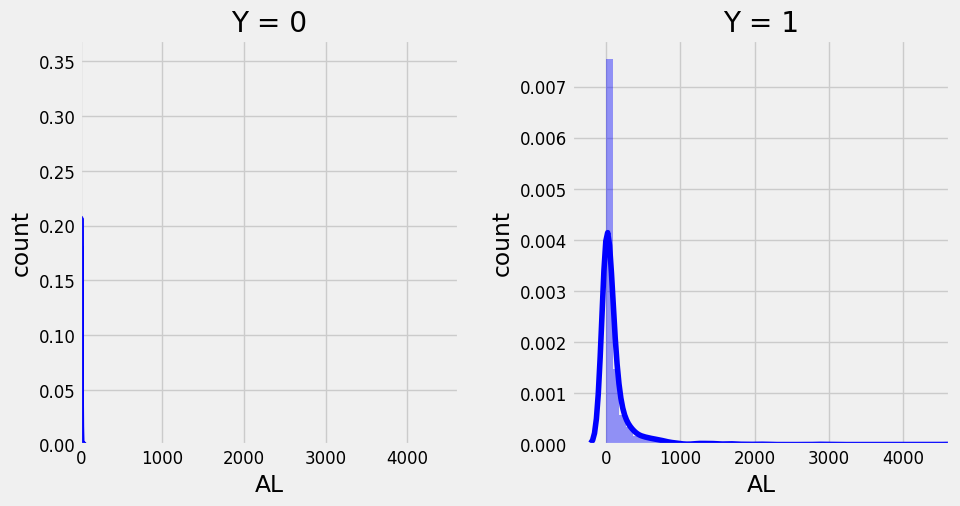

In [31]:
num_plot(train_df, train_0, train_1,'AL')

*    데이터의 경향성을 파악하기 어려운 그래프 형태를 띈다.
*    두 그래프 모두 알루미늄 함유량이 0에 가까울 경우가 많음을 알 수 있다.

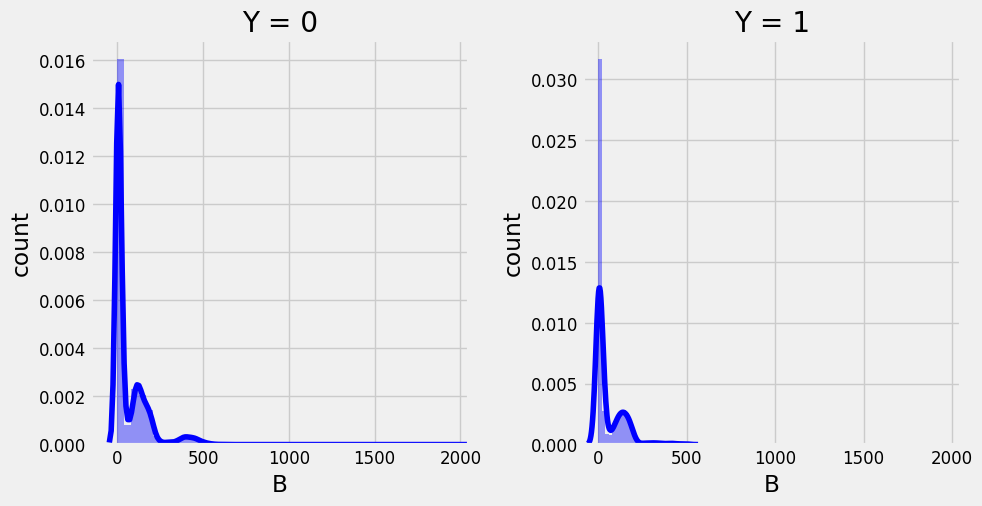

In [32]:
num_plot(train_df, train_0, train_1,'B')

*    Y = 0인 경우의 outlier 편차가 더 크고 250~500 사이의 데이터가 많음을 확인할 수 있다.

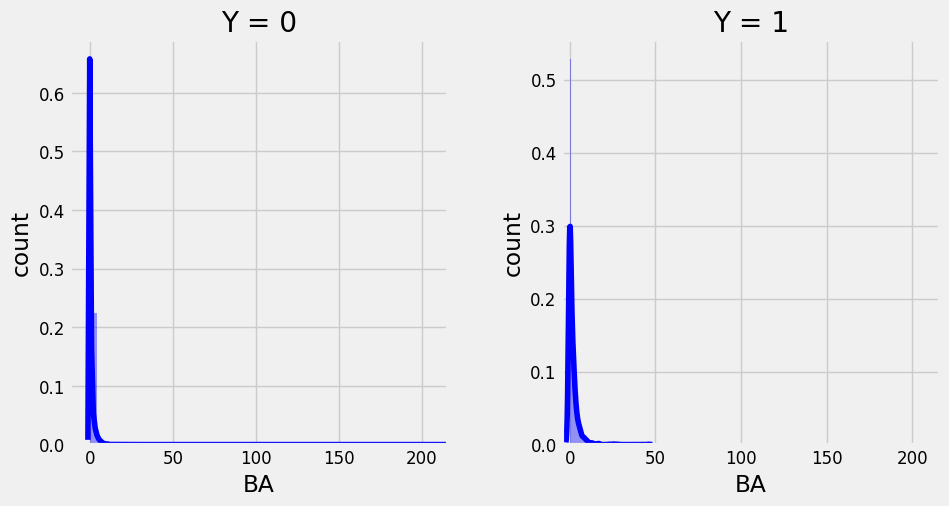

In [33]:
num_plot(train_df, train_0, train_1,'BA')

*    Y = 0일 때, 바륨의 양이 0에 가까운 데이터가 더 많음을 확인할 수 있다.

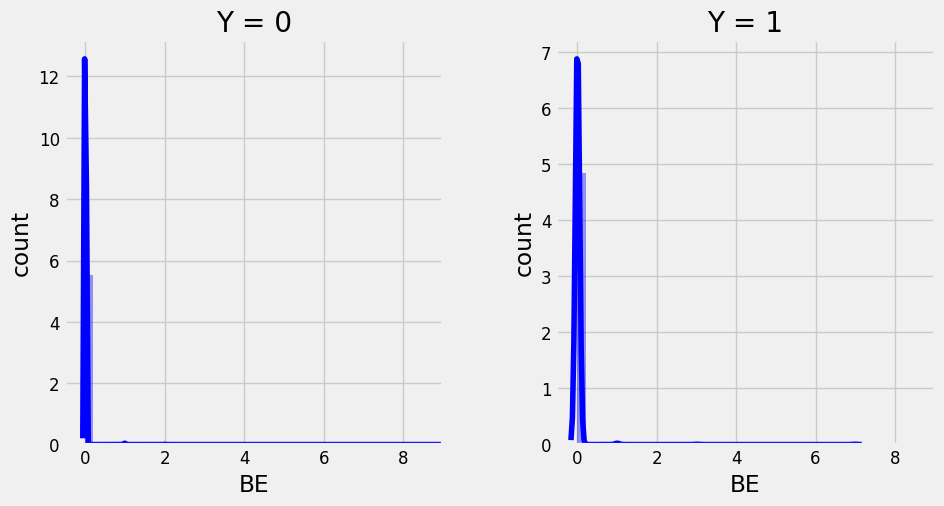

In [34]:
num_plot(train_df, train_0, train_1,'BE')

*    Y = 0일 때, 베릴륨의 양이 0에 가까운 데이터가 더 많음을 확인할 수 있다.

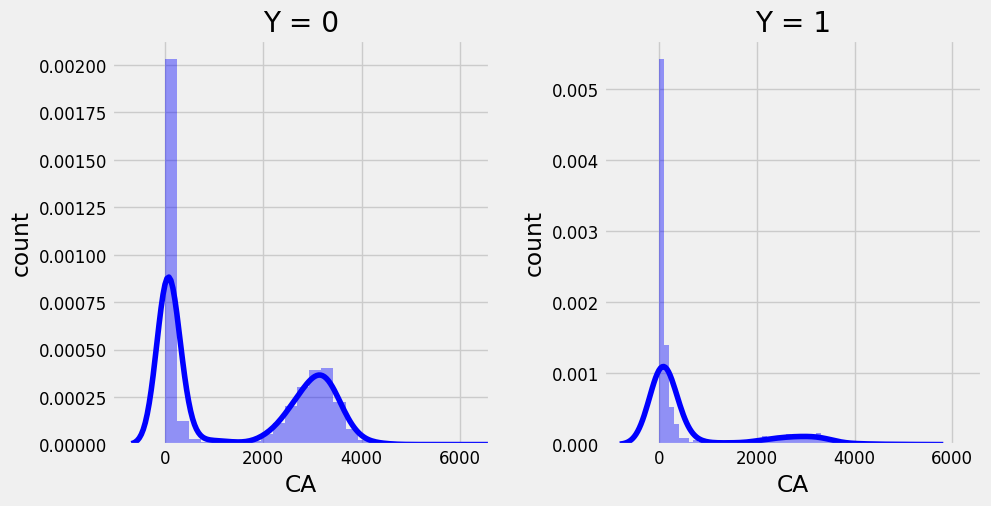

In [35]:
num_plot(train_df, train_0, train_1,'CA')

*    Y = 0인 경우, 칼슘의 양이 2000~4000 사이인 경우가 눈에 띄게 많음을 확인 할 수 있다.

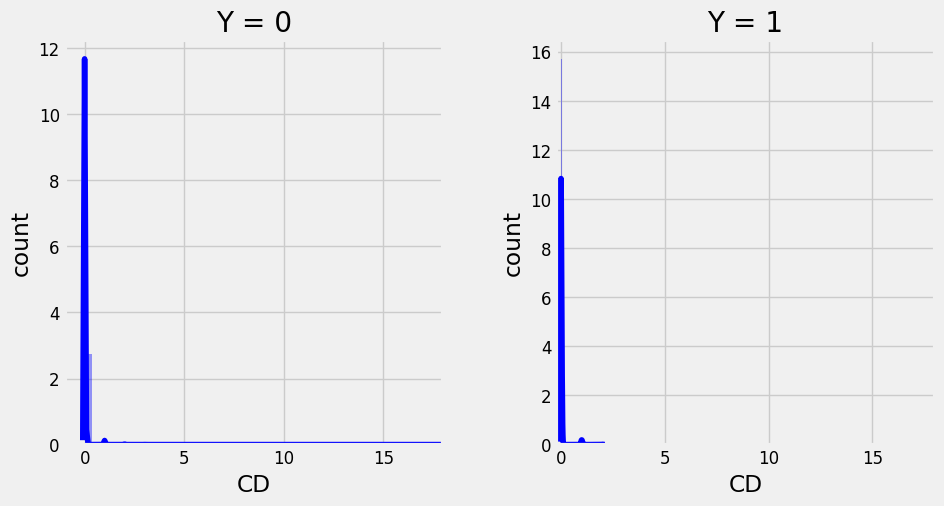

In [36]:
num_plot(train_df, train_0, train_1,'CD')

*    두 데이터가 비슷한 형태의 그래프를 가진다.

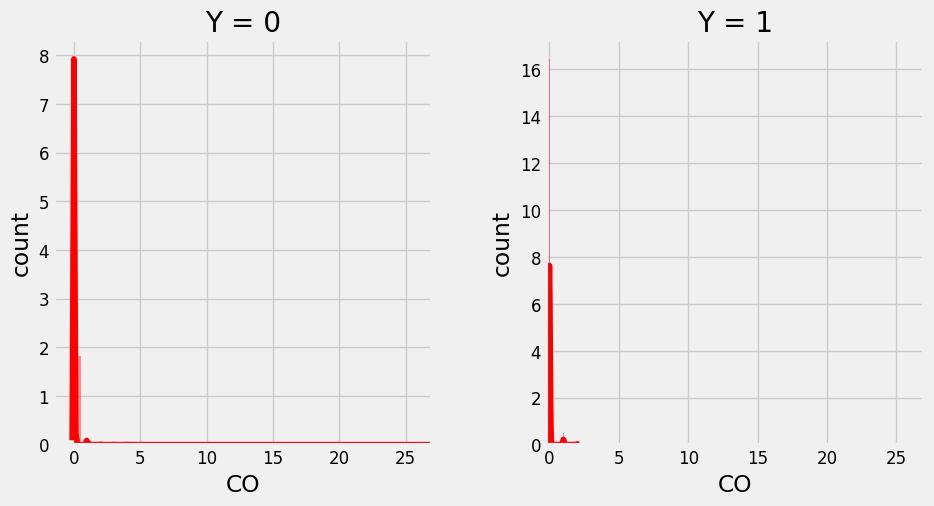

In [37]:
num_plot(train_df, train_0, train_1,'CO')

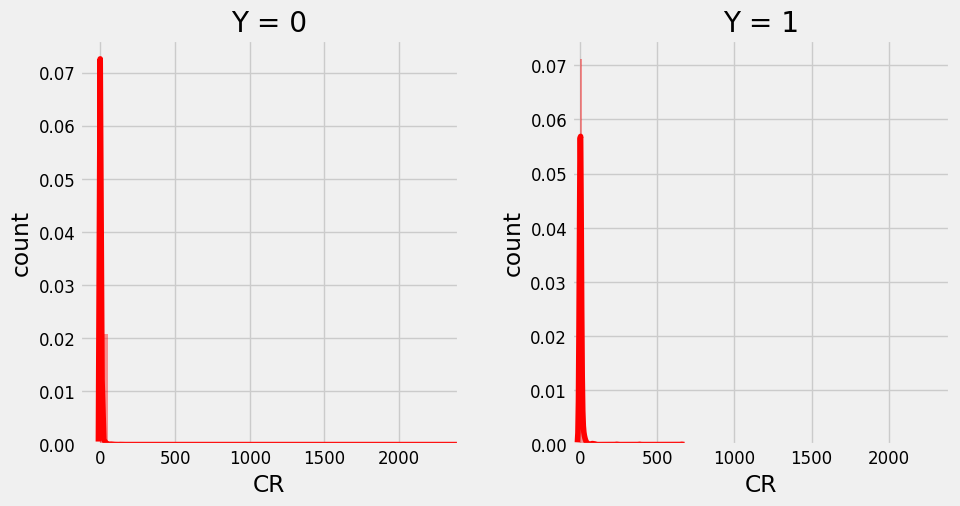

In [38]:
num_plot(train_df, train_0, train_1,'CR')

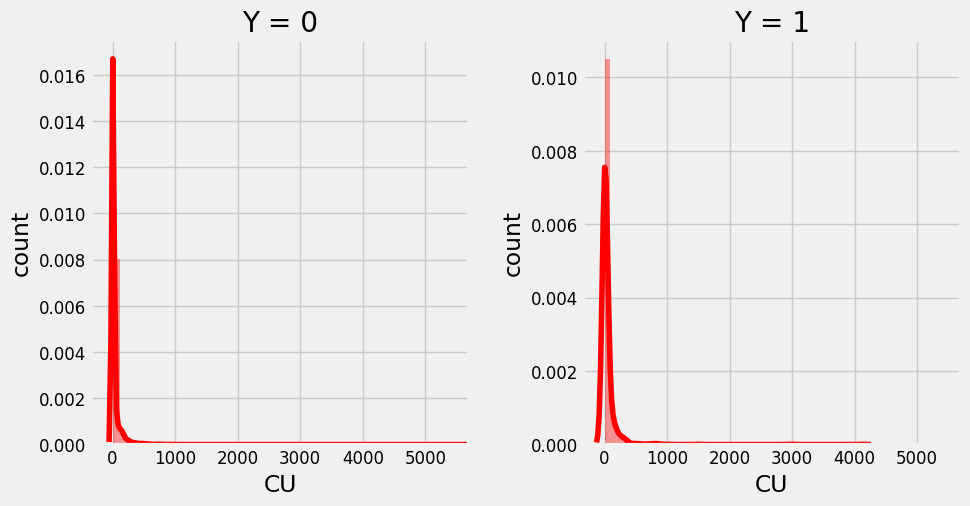

In [39]:
num_plot(train_df, train_0, train_1,'CU')

*    Y = 0일 때, 구리의 양이 0에 가까운 경우가 많다.

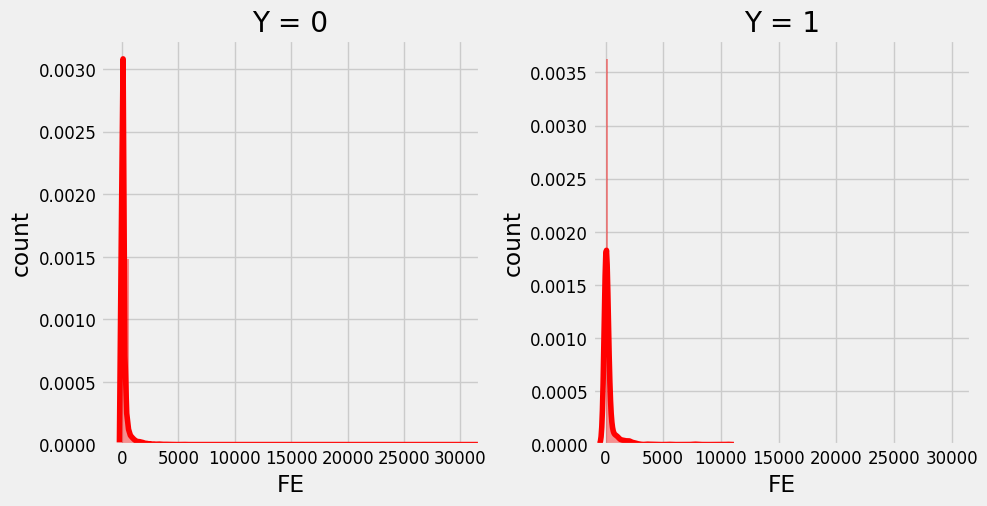

In [40]:
num_plot(train_df, train_0, train_1,'FE')

*    Y = 0일 때,철의 함유량이 0에 가까운 경우가 많다.

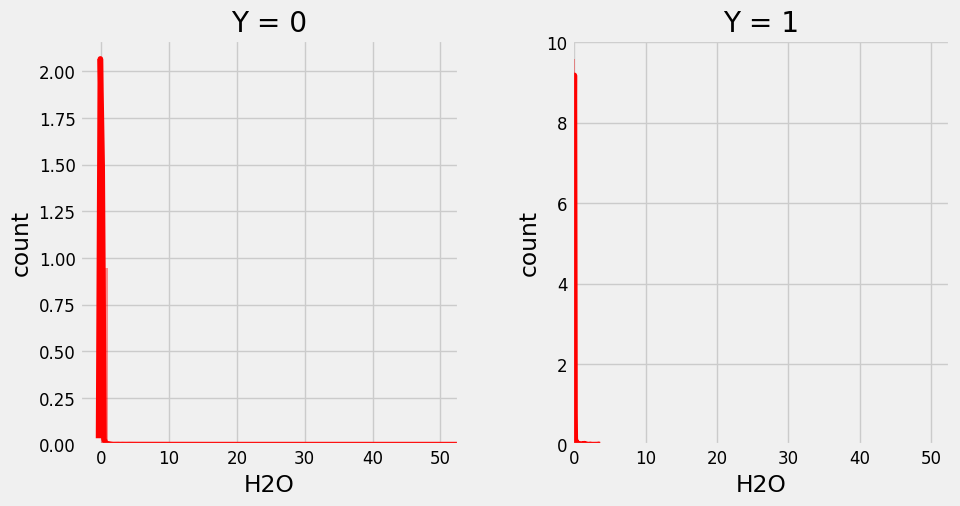

In [41]:
num_plot(train_df, train_0, train_1,'H2O')

*    Y = 1일 때, 물의 함유량이 0에 가까운 경우가 많다.

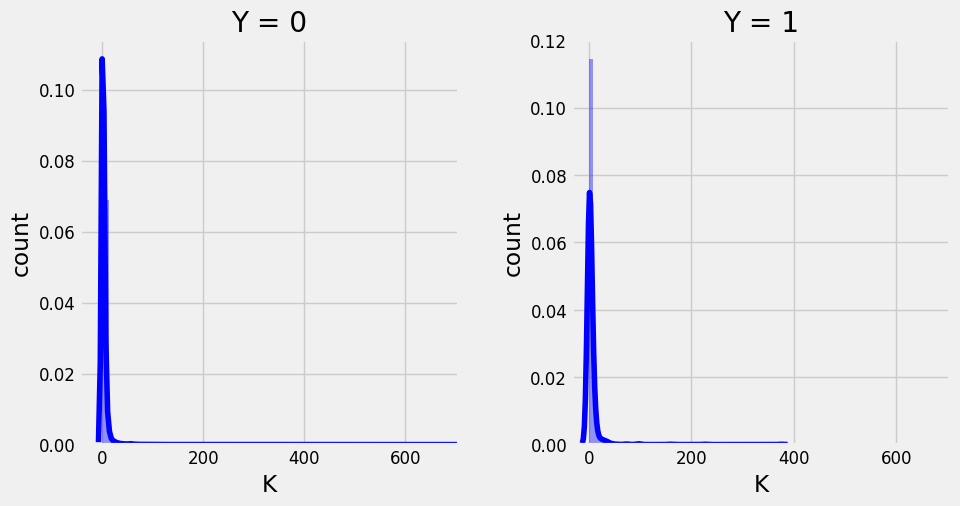

In [42]:
num_plot(train_df, train_0, train_1,'K')

*    Y = 0일 때, 칼륨의 함유량이 0에 가까운 경우가 많다.

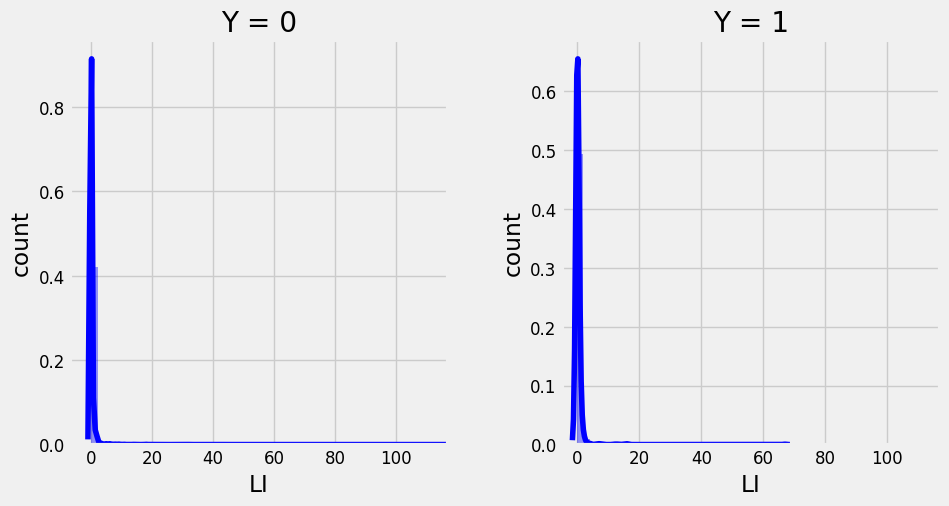

In [43]:
num_plot(train_df, train_0, train_1,'LI')

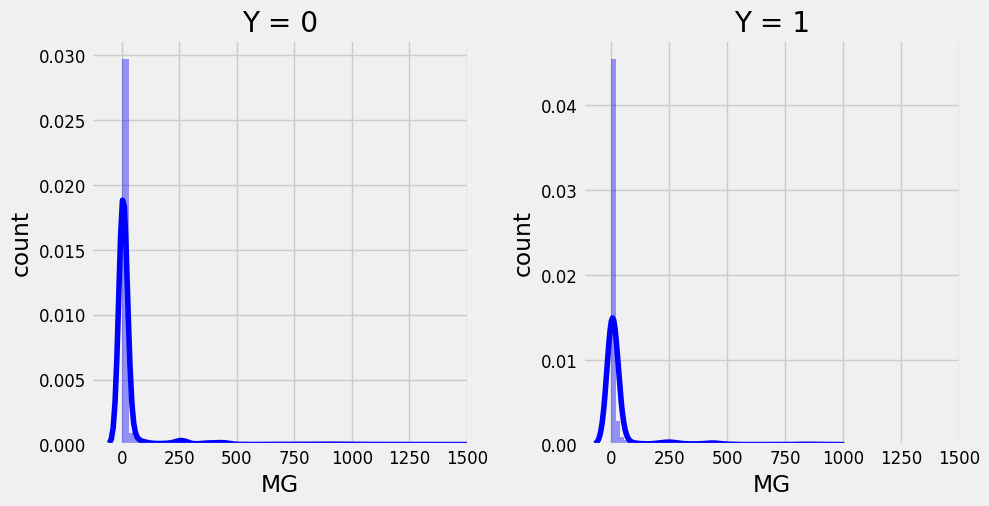

In [44]:
num_plot(train_df, train_0, train_1,'MG')

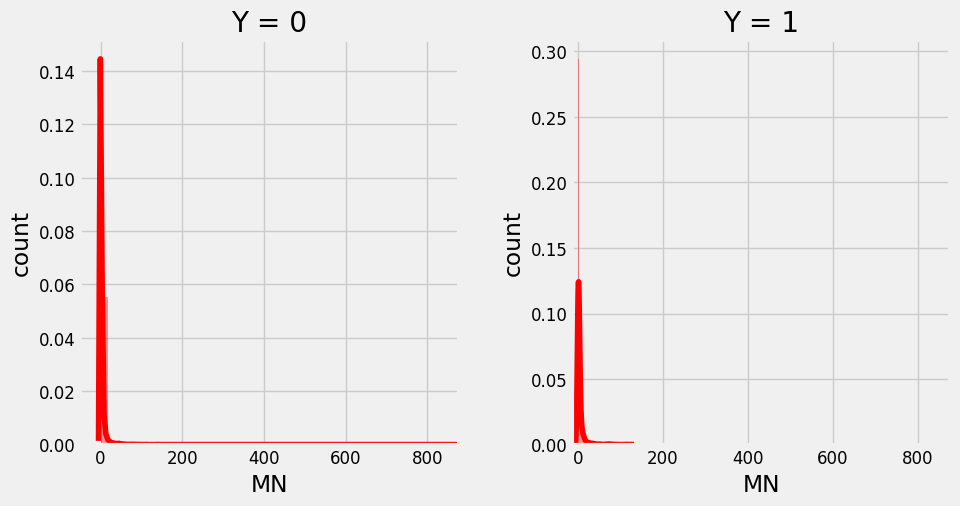

In [45]:
num_plot(train_df, train_0, train_1,'MN')

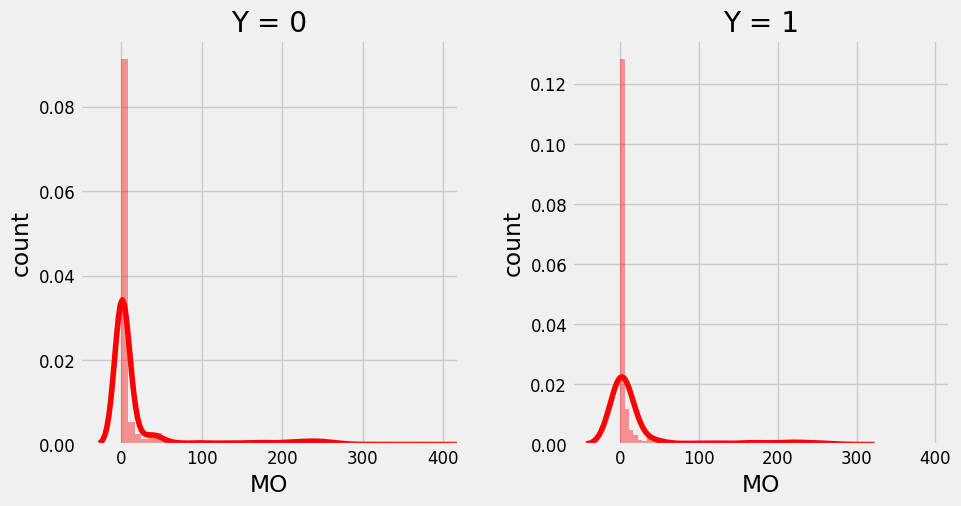

In [46]:
num_plot(train_df, train_0, train_1,'MO')

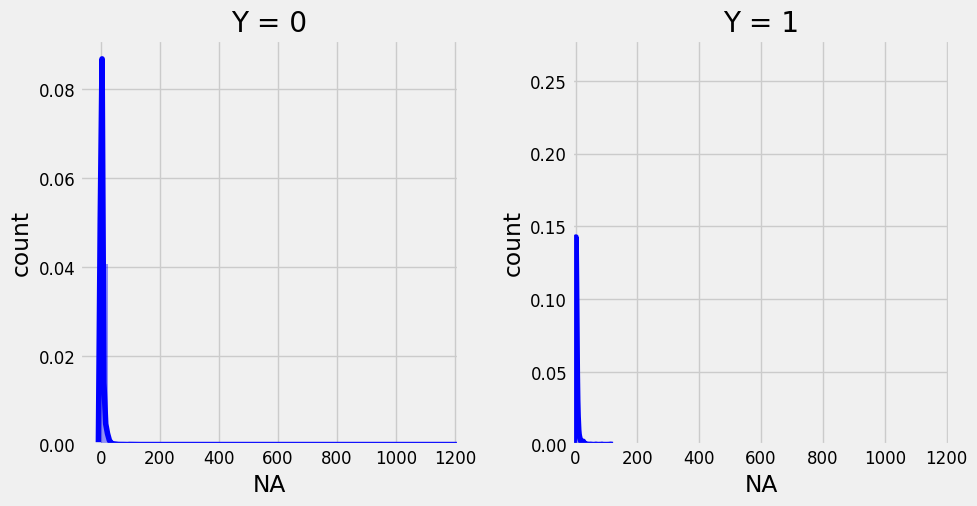

In [47]:
num_plot(train_df, train_0, train_1,'NA')

*    Y = 1일 때, 나트륨의 함유량이 0에 가까운 경우가 많다.

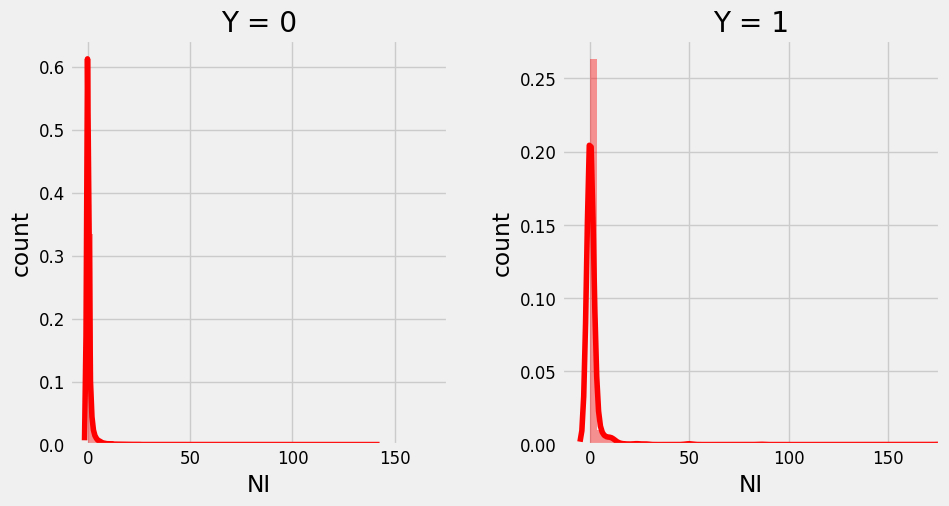

In [48]:
num_plot(train_df, train_0, train_1,'NI')

*    Y = 0일 때, 니켈의 함유량이 0에 가까운 경우가 많다.

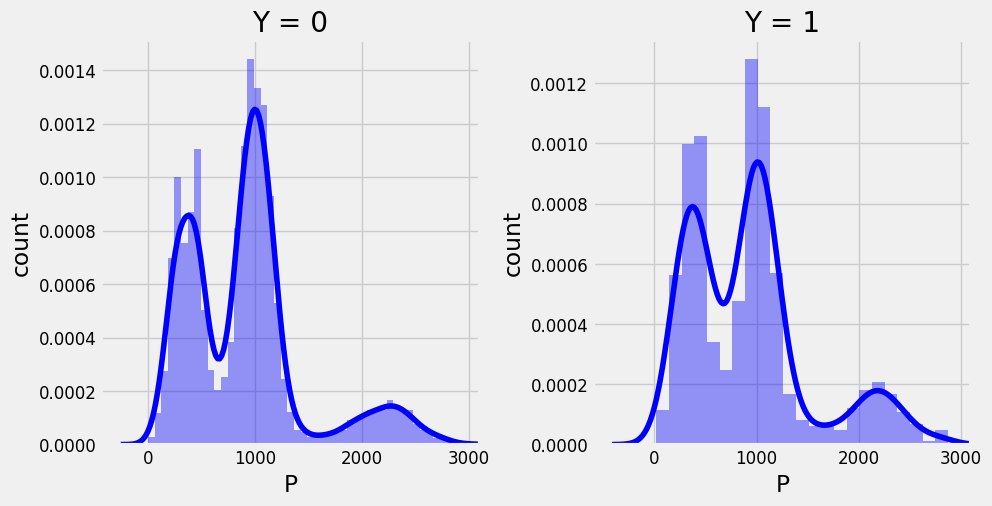

In [49]:
num_plot(train_df, train_0, train_1,'P')

*    그래프의 경향성은 대체로 비슷하나 Y = 1일 때 인의 함유량이 500 ~ 875인 경우가 상대적으로 많고, 인의 함유량이 875 ~ 1500인 경우가 상대적으로 적다.

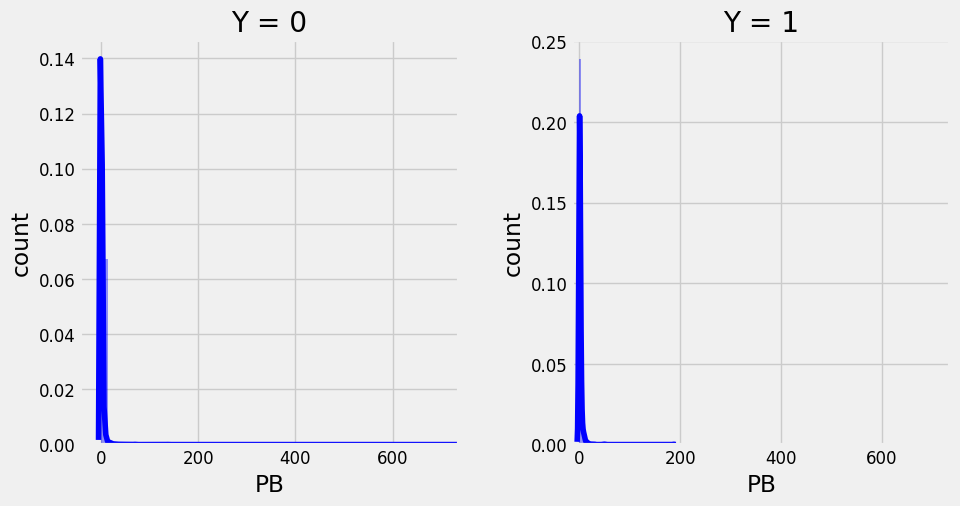

In [50]:
num_plot(train_df, train_0, train_1,'PB')

*    Y = 1일 때, 납의 함유량이 0에 가까운 경우가 많다.

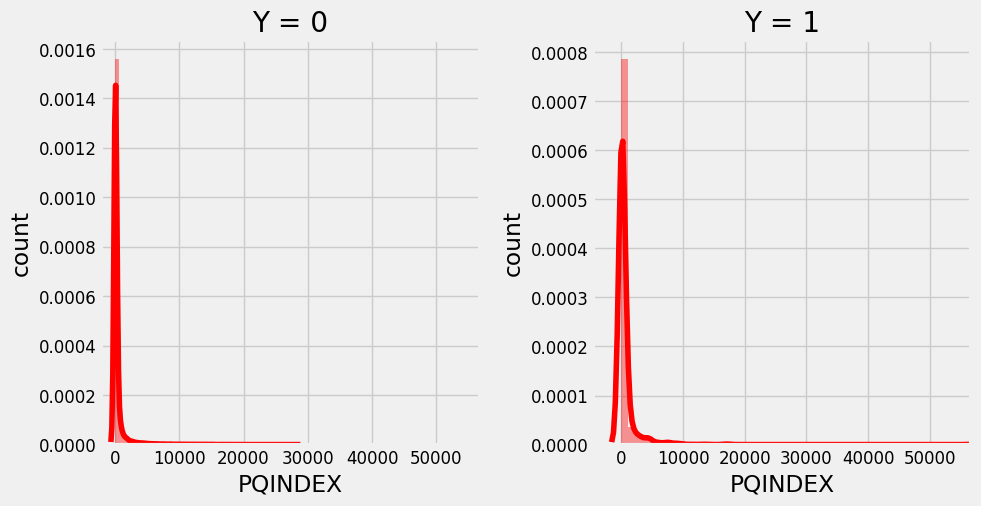

In [51]:
num_plot(train_df, train_0, train_1,'PQINDEX')

*    Y = 0일 때, 입자 정량화 지수가 0에 가까운 경우가 많다.

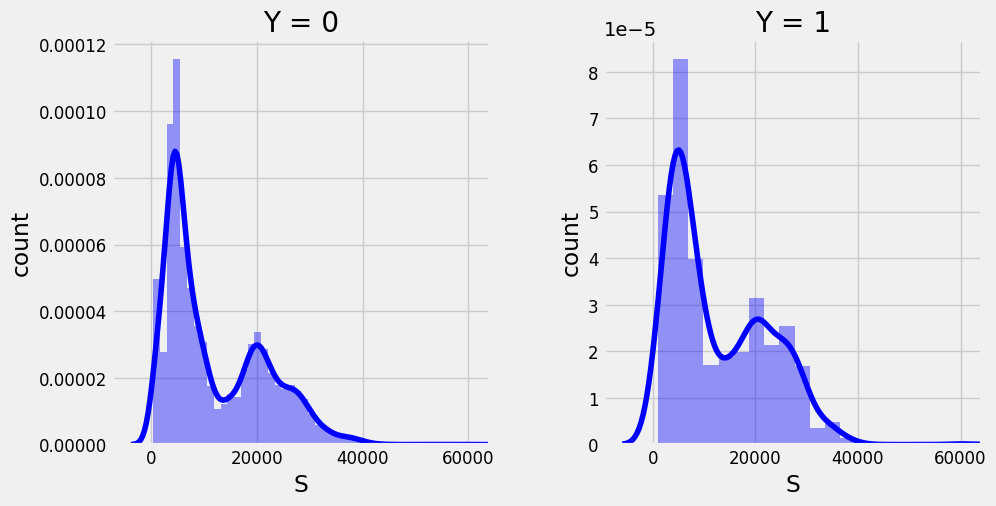

In [52]:
num_plot(train_df, train_0, train_1,'S')

*    그래프의 경향성은 대체로 비슷하나 Y = 1일 때 황의 함유량이 20000~30000인 경우가 상대적으로 많다.

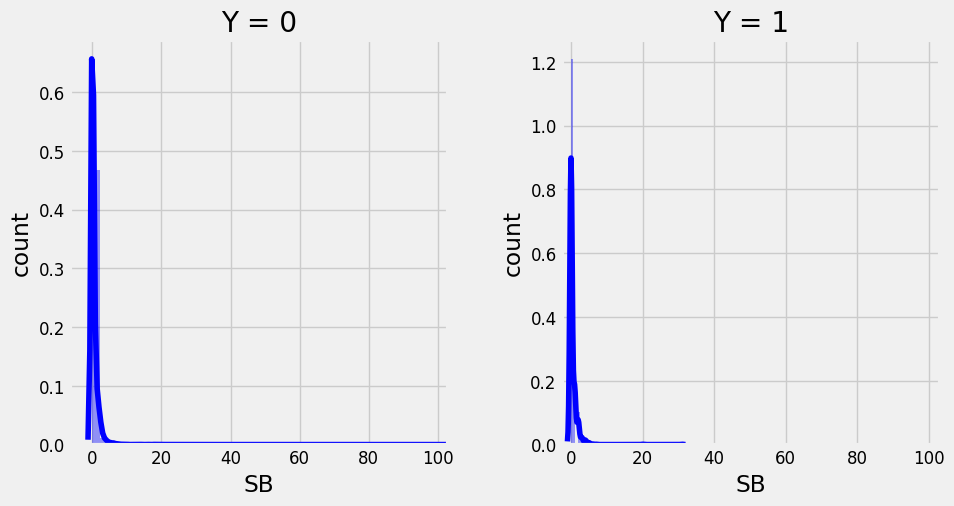

In [53]:
num_plot(train_df, train_0, train_1,'SB')

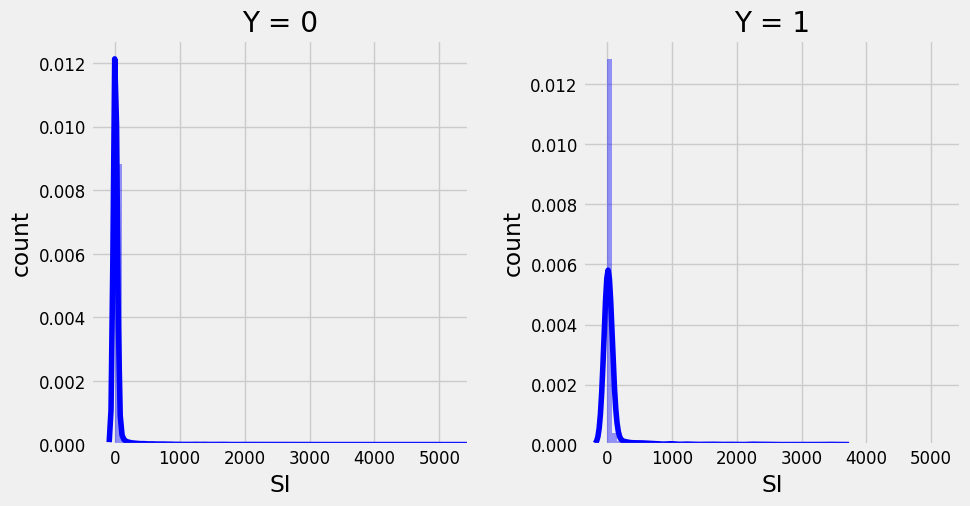

In [54]:
num_plot(train_df, train_0, train_1,'SI')

*    Y = 0일 때, 규소의 함유량이 0에 가까운 경우가 많다.

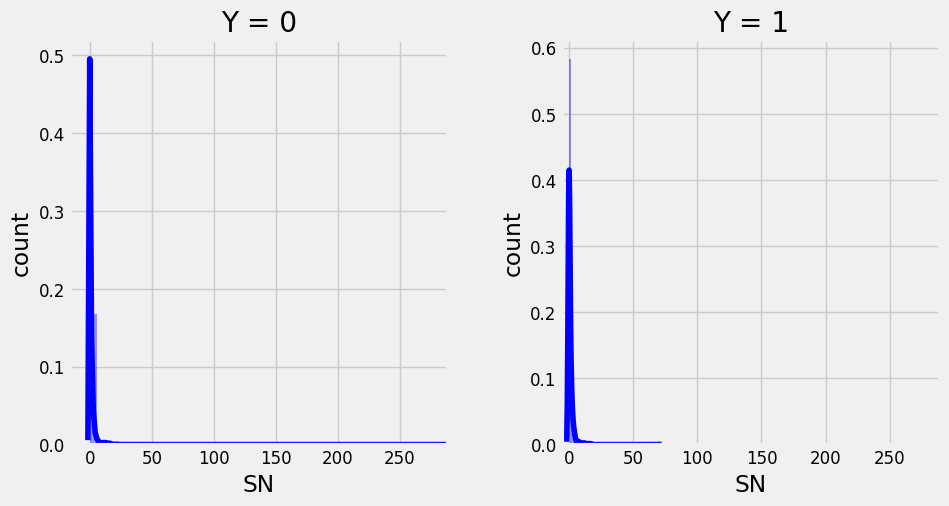

In [55]:
num_plot(train_df, train_0, train_1,'SN')

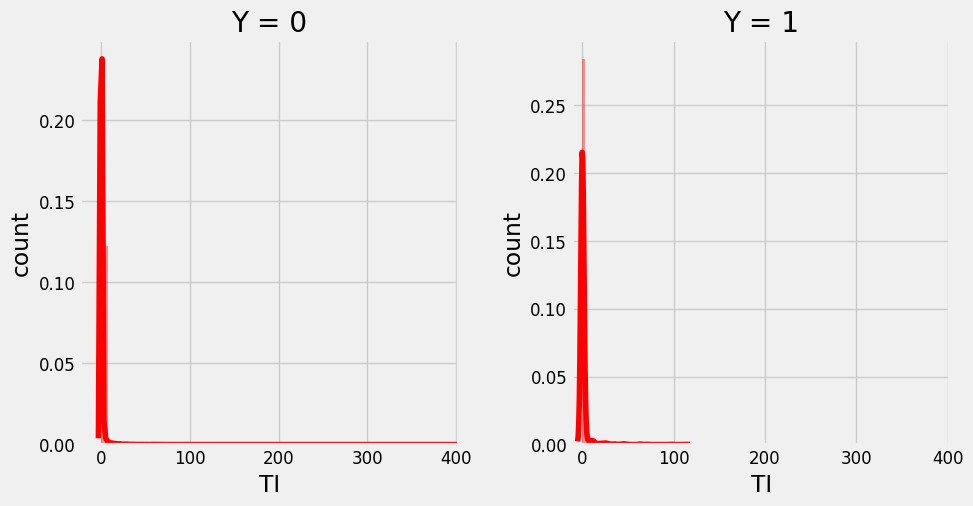

In [56]:
num_plot(train_df, train_0, train_1,'TI')

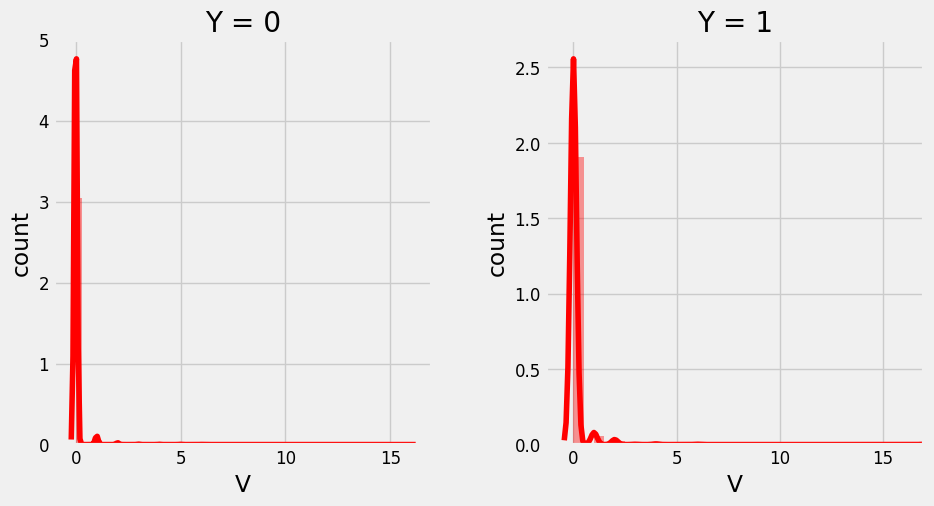

In [57]:
num_plot(train_df, train_0, train_1,'V')

*    그래프의 경향성은 대체로 비슷하나 Y = 1일 때 바나듐의 함유량이 0에 가까운 경우가 상대적으로 적고, 바나듐의 함유량이 0 ~ 2.5인 경우가 상대적으로 많다.

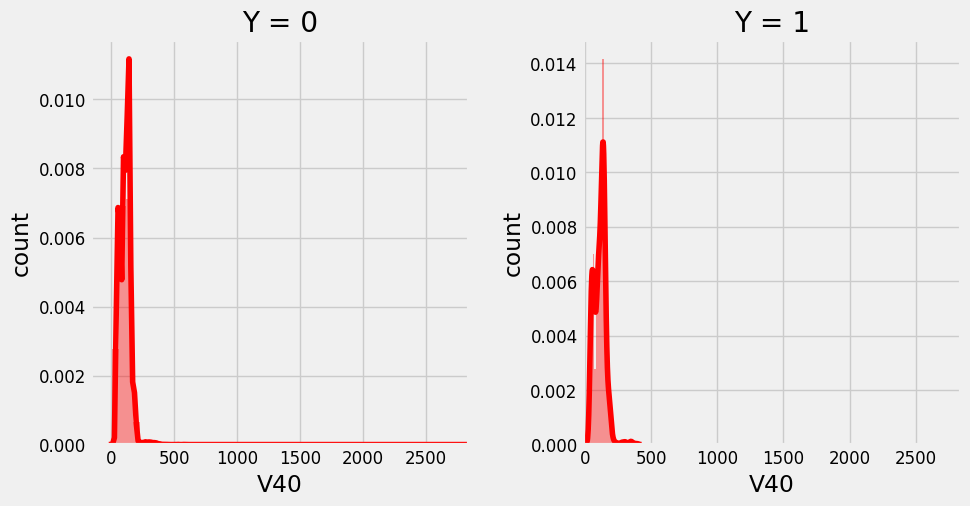

In [58]:
num_plot(train_df, train_0, train_1,'V40')

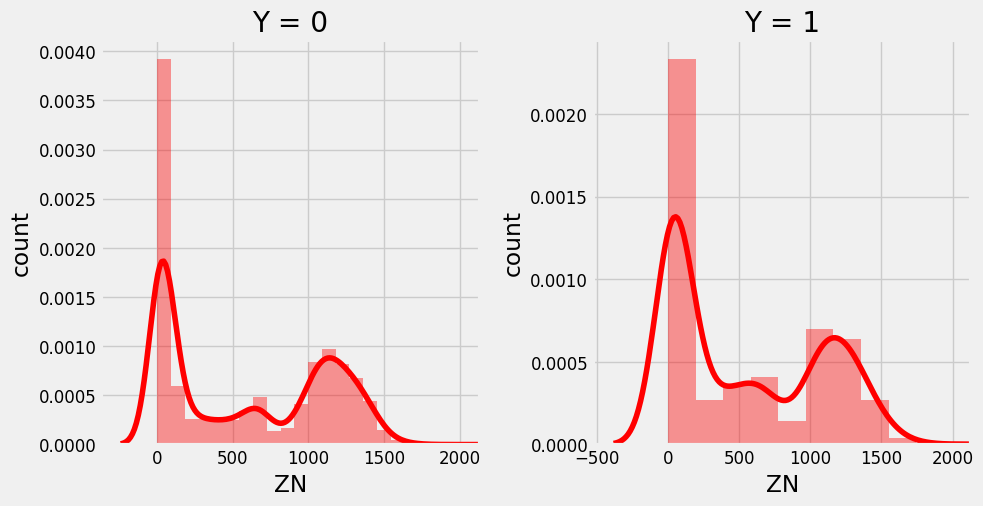

In [59]:
num_plot(train_df, train_0, train_1,'ZN')

*    대부분의 feature가 Y 여부에 관계없이 비슷한 경향을 띈다.
*    대부분의 feature에서 Y = 0일 때, outlier의 분포가 더 크다.
*    Test 데이터에 포함되는 feature와 Test 데이터에 포함되지 않는 feature 간의 유의미한 차이점은 찾아볼 수 없다.


# 상관관계분석


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14095 entries, TRAIN_00000 to TRAIN_14094
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMPONENT_ARBITRARY  14095 non-null  object 
 1   ANONYMOUS_1          14095 non-null  int64  
 2   YEAR                 14095 non-null  int64  
 3   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 4   ANONYMOUS_2          14095 non-null  int64  
 5   AG                   14095 non-null  int64  
 6   AL                   14095 non-null  int64  
 7   B                    14095 non-null  int64  
 8   BA                   14095 non-null  int64  
 9   BE                   14095 non-null  int64  
 10  CA                   14095 non-null  int64  
 11  CD                   12701 non-null  float64
 12  CO                   14095 non-null  int64  
 13  CR                   14095 non-null  int64  
 14  CU                   14095 non-null  int64  
 15  FE                   1409

In [65]:
train_corr = train_df.drop(train_df[categorical_features], axis=1)
train_corr['Y_LABEL'] = train_df['Y_LABEL']
# Y_LABEL을 object형에서 int형으로 변환
train_corr = train_corr.astype({'Y_LABEL' : 'int'})
corr = train_corr.corr(method='pearson')
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

<Axes: >

**아래 코드는 데이터프레임 corr에서 'Y_LABEL' 열과의 상관관계를 계산한 후, 이를 기준으로 정렬하여 'Y_LABEL' 열과의 상관관계를 나타내는 train_temp 데이터프레임을 생성하는 부분**

In [66]:
correlation = corr.unstack()
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
train_temp.style.background_gradient(cmap='viridis')

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
PQINDEX,0.028966
S,0.027923
TI,0.025637


*    heatmap과 위의 표를 참고했을 때, `Y_LABEL`과 가장 연관성이 큰 feature는 `AL`이고 이는 알루미늄 함유량이 `Y_LABEL`, 즉 Y값에 가장 많은 영향을 미침을 알 수 있다. 하지만 관계계수의 값이 커 큰 영향을 끼친다고 할 수 없다.
*    또한 상관관계 분석에서는 `Y_LABEL`에 큰 영향을 주는 feature가 거의 없는 것을 확인할 수 있다.


# ✅ **결론**

1. 정상치와 이상치의 비율이 지나치게 Imbalance하다.
2. 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
3. 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
4. train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.